#Index  

<a href=#imports>Import Statements</a>

<a href=#loadData>Load Data</a>

<a href=#bookmark>Working on Form</a>

 <a href=#neighborhood_houses_sold>Neighborhood houses sold chart</a>



In [1]:
from ipywidgets import Button
import ipywidgets as widgets
print(widgets.Button.on_click.__doc__)

Register a callback to execute when the button is clicked.

        The callback will be called with one argument, the clicked button
        widget instance.

        Parameters
        ----------
        remove: bool (optional)
            Set to true to remove the callback from the list of callbacks.
        


In [58]:
from IPython.display import HTML
b_danger = Button(description='Danger Button', button_style='danger')
output = widgets.Output()

b1 = Button(description='Custom color')
b1.style.button_color = 'lightgreen'
#b1
#b_danger
def on_button_clicked(b):
    with output:
        
        %who
display(b_danger, output)
b_danger.on_click(on_button_clicked)

Button(button_style='danger', description='Danger Button', style=ButtonStyle())

Output()

In [57]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "none"

# Import Statements

<a name='imports' />

In [82]:
import project_path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import (train_test_split, 
                                     RandomizedSearchCV, 
                                     cross_val_score,
                                     RepeatedStratifiedKFold
                                    )
from sklearn.neighbors import NearestNeighbors
from sklearn import preprocessing
from sklearn.impute import KNNImputer
from scipy import stats
from sklearn.ensemble import (RandomForestRegressor, 
                              RandomForestClassifier
                             )
from sklearn.metrics import (accuracy_score, 
                             confusion_matrix, 
                             precision_score, 
                             recall_score, 
                             #roc_auc_score, 
                             #roc_curve, 
                             f1_score
                            )
from sklearn.preprocessing import (OneHotEncoder, 
                                   OrdinalEncoder
                                  )
from sklearn.compose import make_column_transformer
from pprint import pprint
from sklearn.pipeline import make_pipeline
from numpy import (mean, 
                   std
                  )
#from numpy import std
from sklearn.datasets import make_classification
from sklearn.tree import export_graphviz
from scipy.stats import mode as sc_mode
import os
from IPython.display import display, Image 
#from funct import *

pd.set_option('display.max_columns', None)

%matplotlib inline

In [83]:


display(HTML(data="""
<style>
    div#notebook-container    { width: 60%; }
    div#menubar-container     { width: 60%; }
    div#maintoolbar-container { width: 60%; }
    div.cell.selected {border-left-width: 1px !important; }
    div.output_scroll {resize: vertical !important; }
    
    div.cell{
        width: 1300px; /* altered from 850px*/
        margin-left: -30%!important; /*altered from 10%*/
        margin-right: 15%; /*altered from auto%*/
        font-family: "Open sans",verdana,arial,sans-serif;
        line-height: 135%;
        font-size: 105%;
        
        margin-left:auto;
        margin-right:auto;
        text-align:justify;
        text-justify:inter-word;
        font:
    }
    h1 {
        font-family: "Open sans",verdana,arial,sans-serif;
    }
    .text_cell_render h1 {
        font-weight: 200;
        font-size: 30pt;
        line-height: 100%;
        color:#447adb;
        margin-bottom: 0em;
        margin-top: 0em;
        display: block;
        white-space: nowrap;
    } 
    div.text_cell_render{
        font-family: "Open sans",verdana,arial,sans-serif;
        line-height: 135%;
        font-size: 205%;
        width:1050px; /* altered from 750px */
        margin-left:auto;
        margin-right:auto;
        text-align:justify;
        text-justify:inter-word;
    }
</style>
"""))

In [84]:
#!jupyter-nbextension install rise --py --sys-prefix jupyter-nbextension enable 
!jupyter-nbextension enable rise --py --sys-prefix

Enabling notebook extension rise/main...
      - Validating: OK


['random_forest_w2.ipynb', '.DS_Store', 'lr_ames_model.ipynb', 'images', 'Untitled.ipynb', 'house_project.ipynb', 'project_path.py', 'ramdom_forest.ipynb', '__pycache__', 'Ames_Random_Forrest.ipynb', 'funct.py', 'grid_search_initial.ipynb', '.gitignore', 'functions', '.ipynb_checkpoints', '.git', 'data', 'neigh_boxplot.png', 'notes.ipynb']


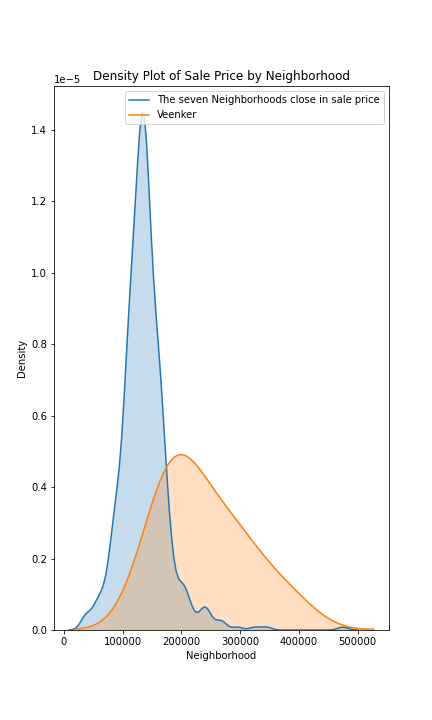

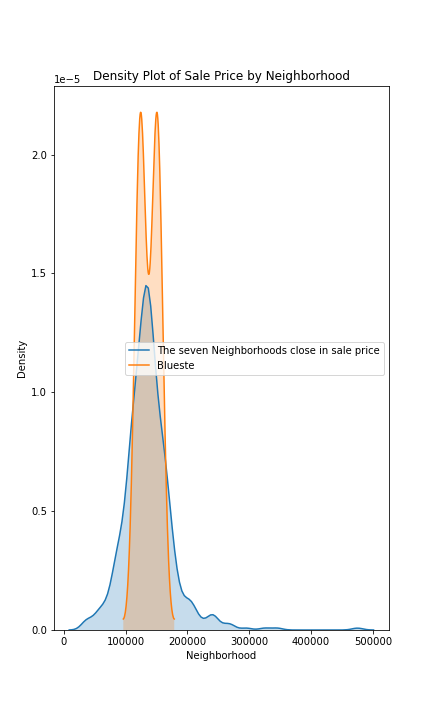

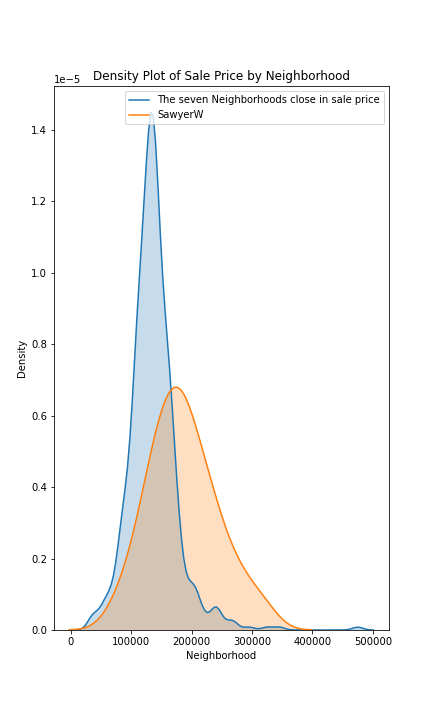

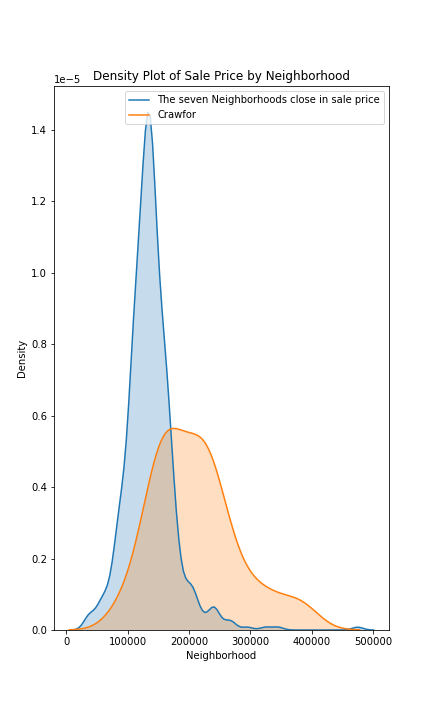

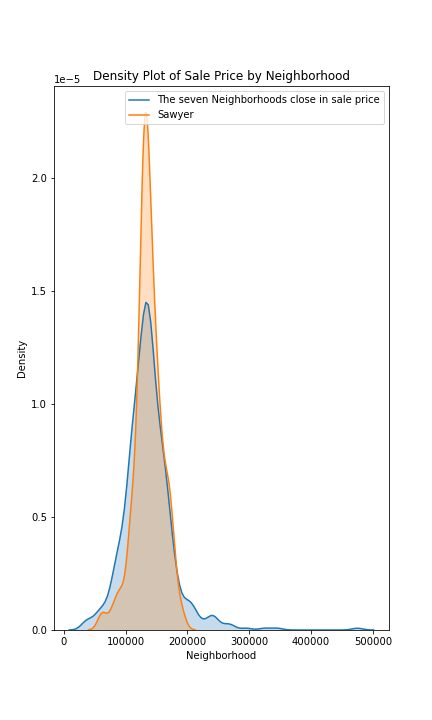

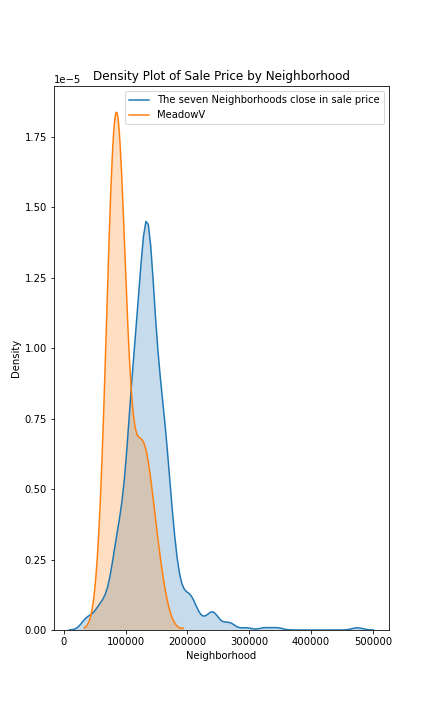

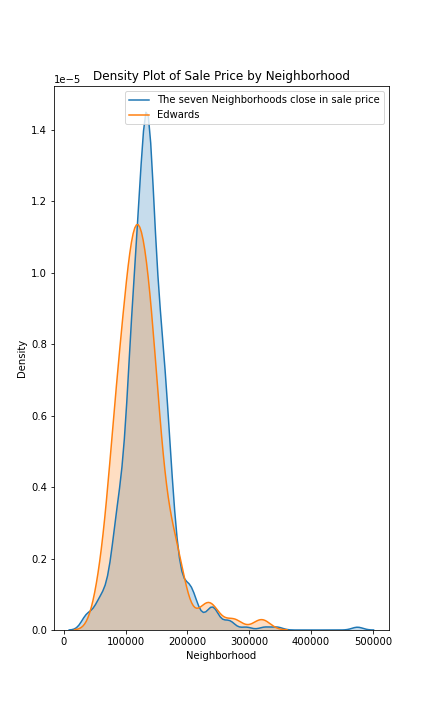

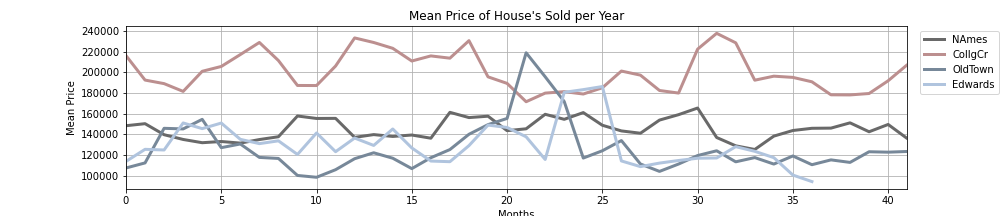

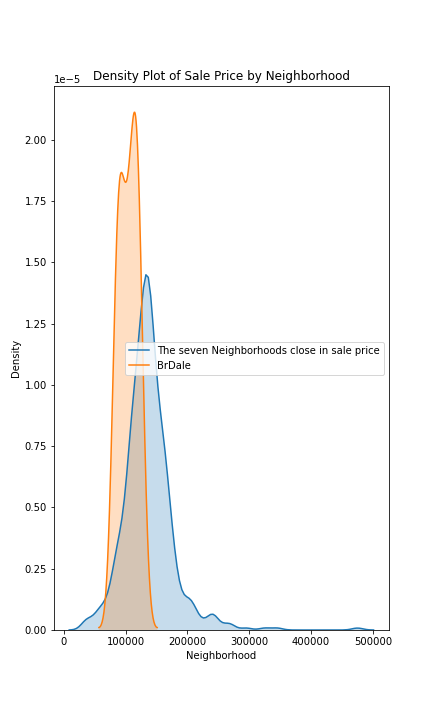

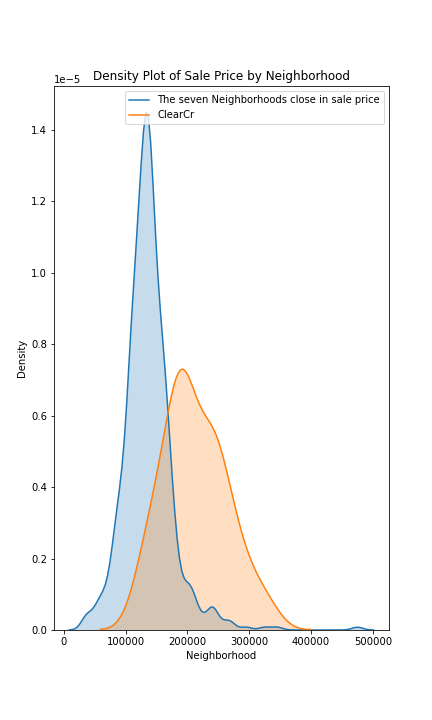

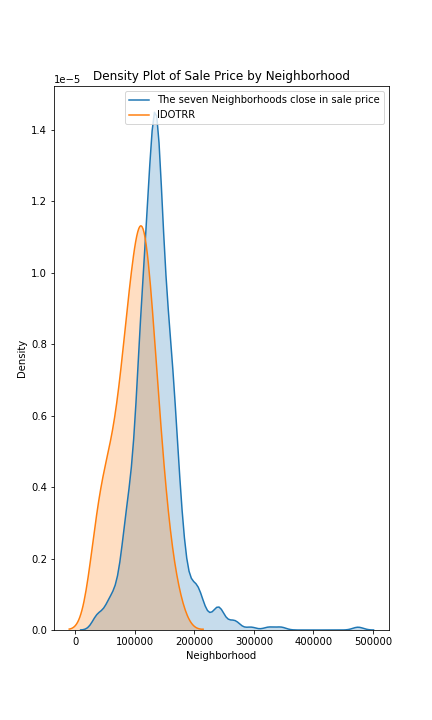

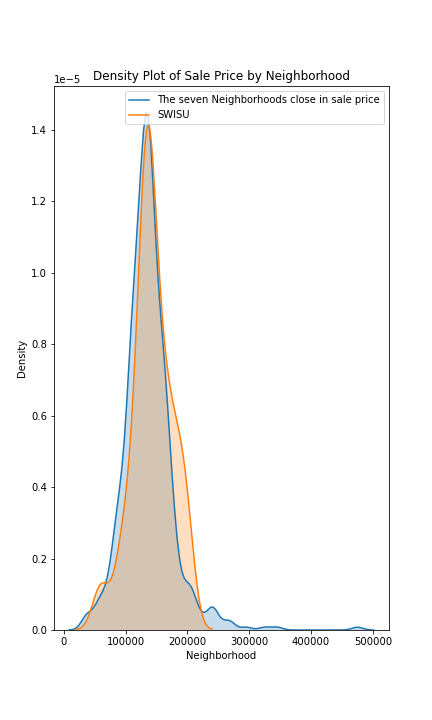

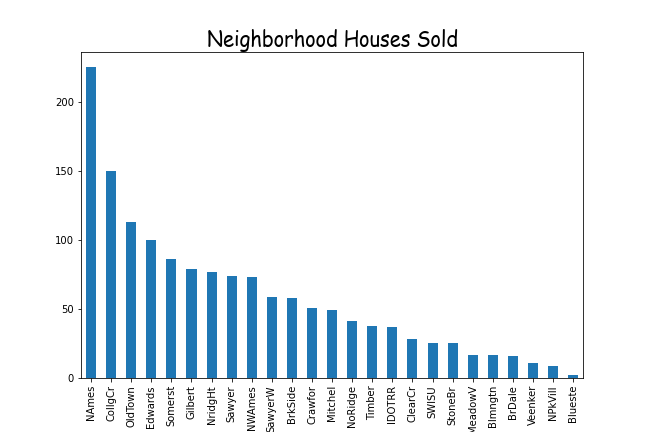

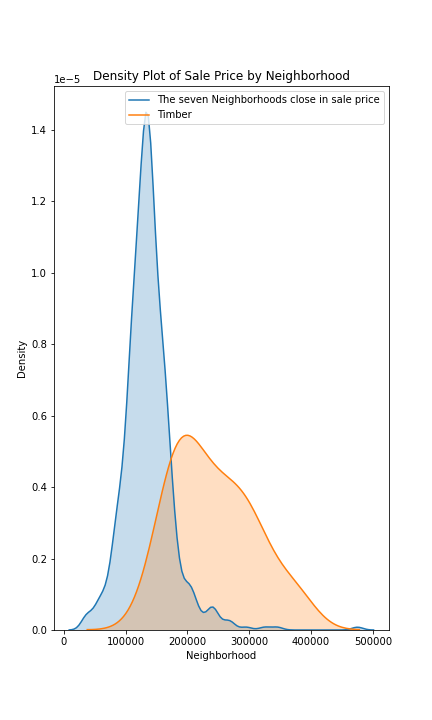

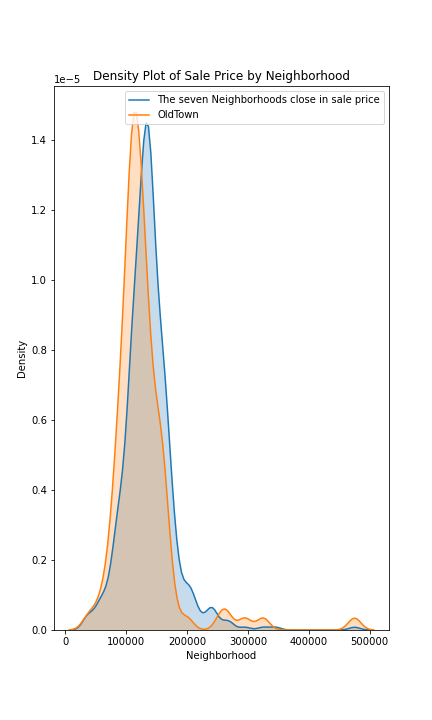

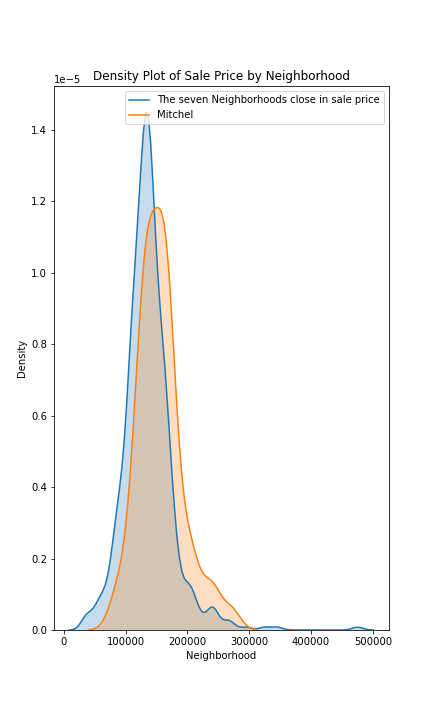

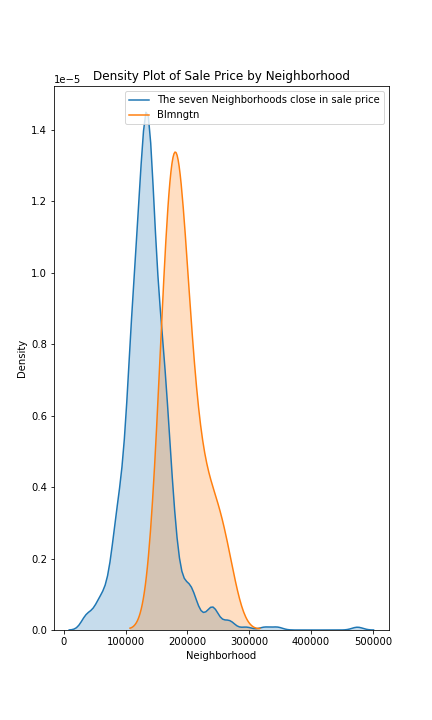

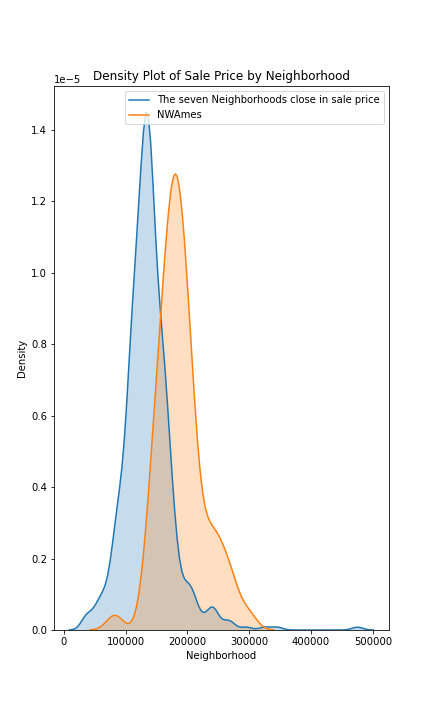

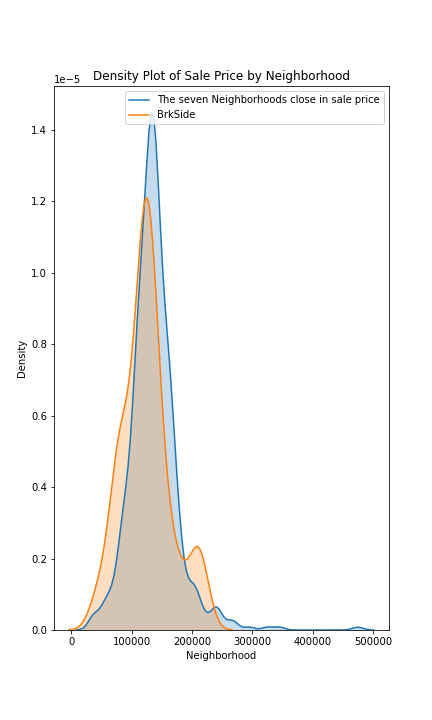

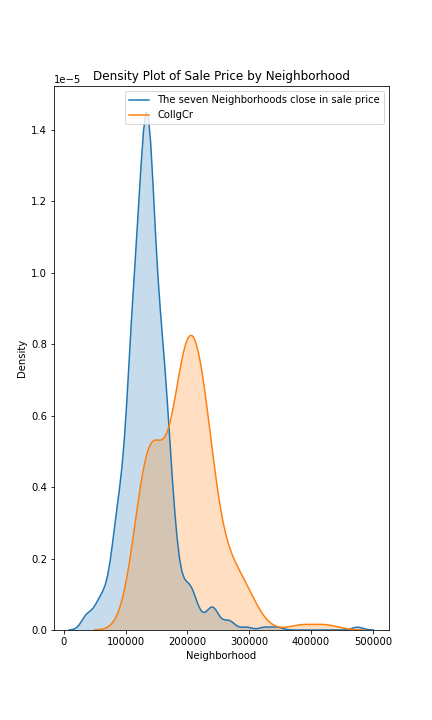

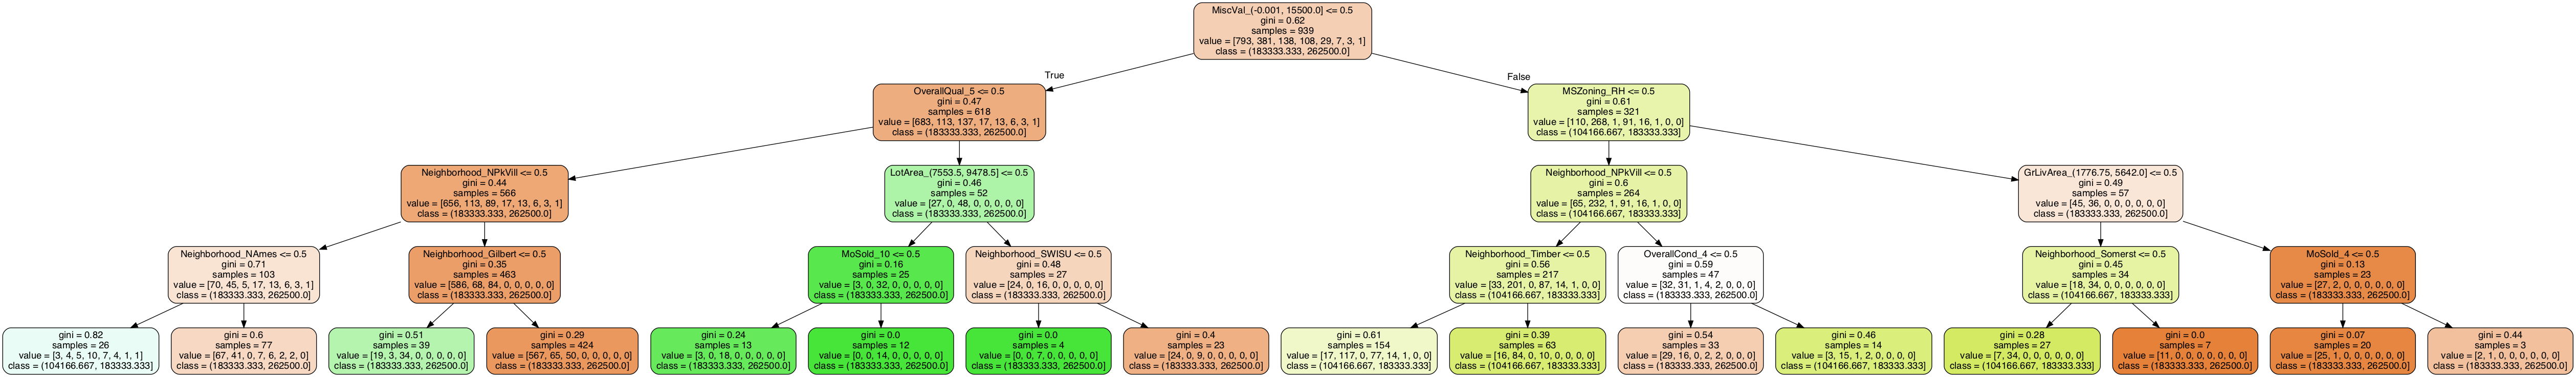

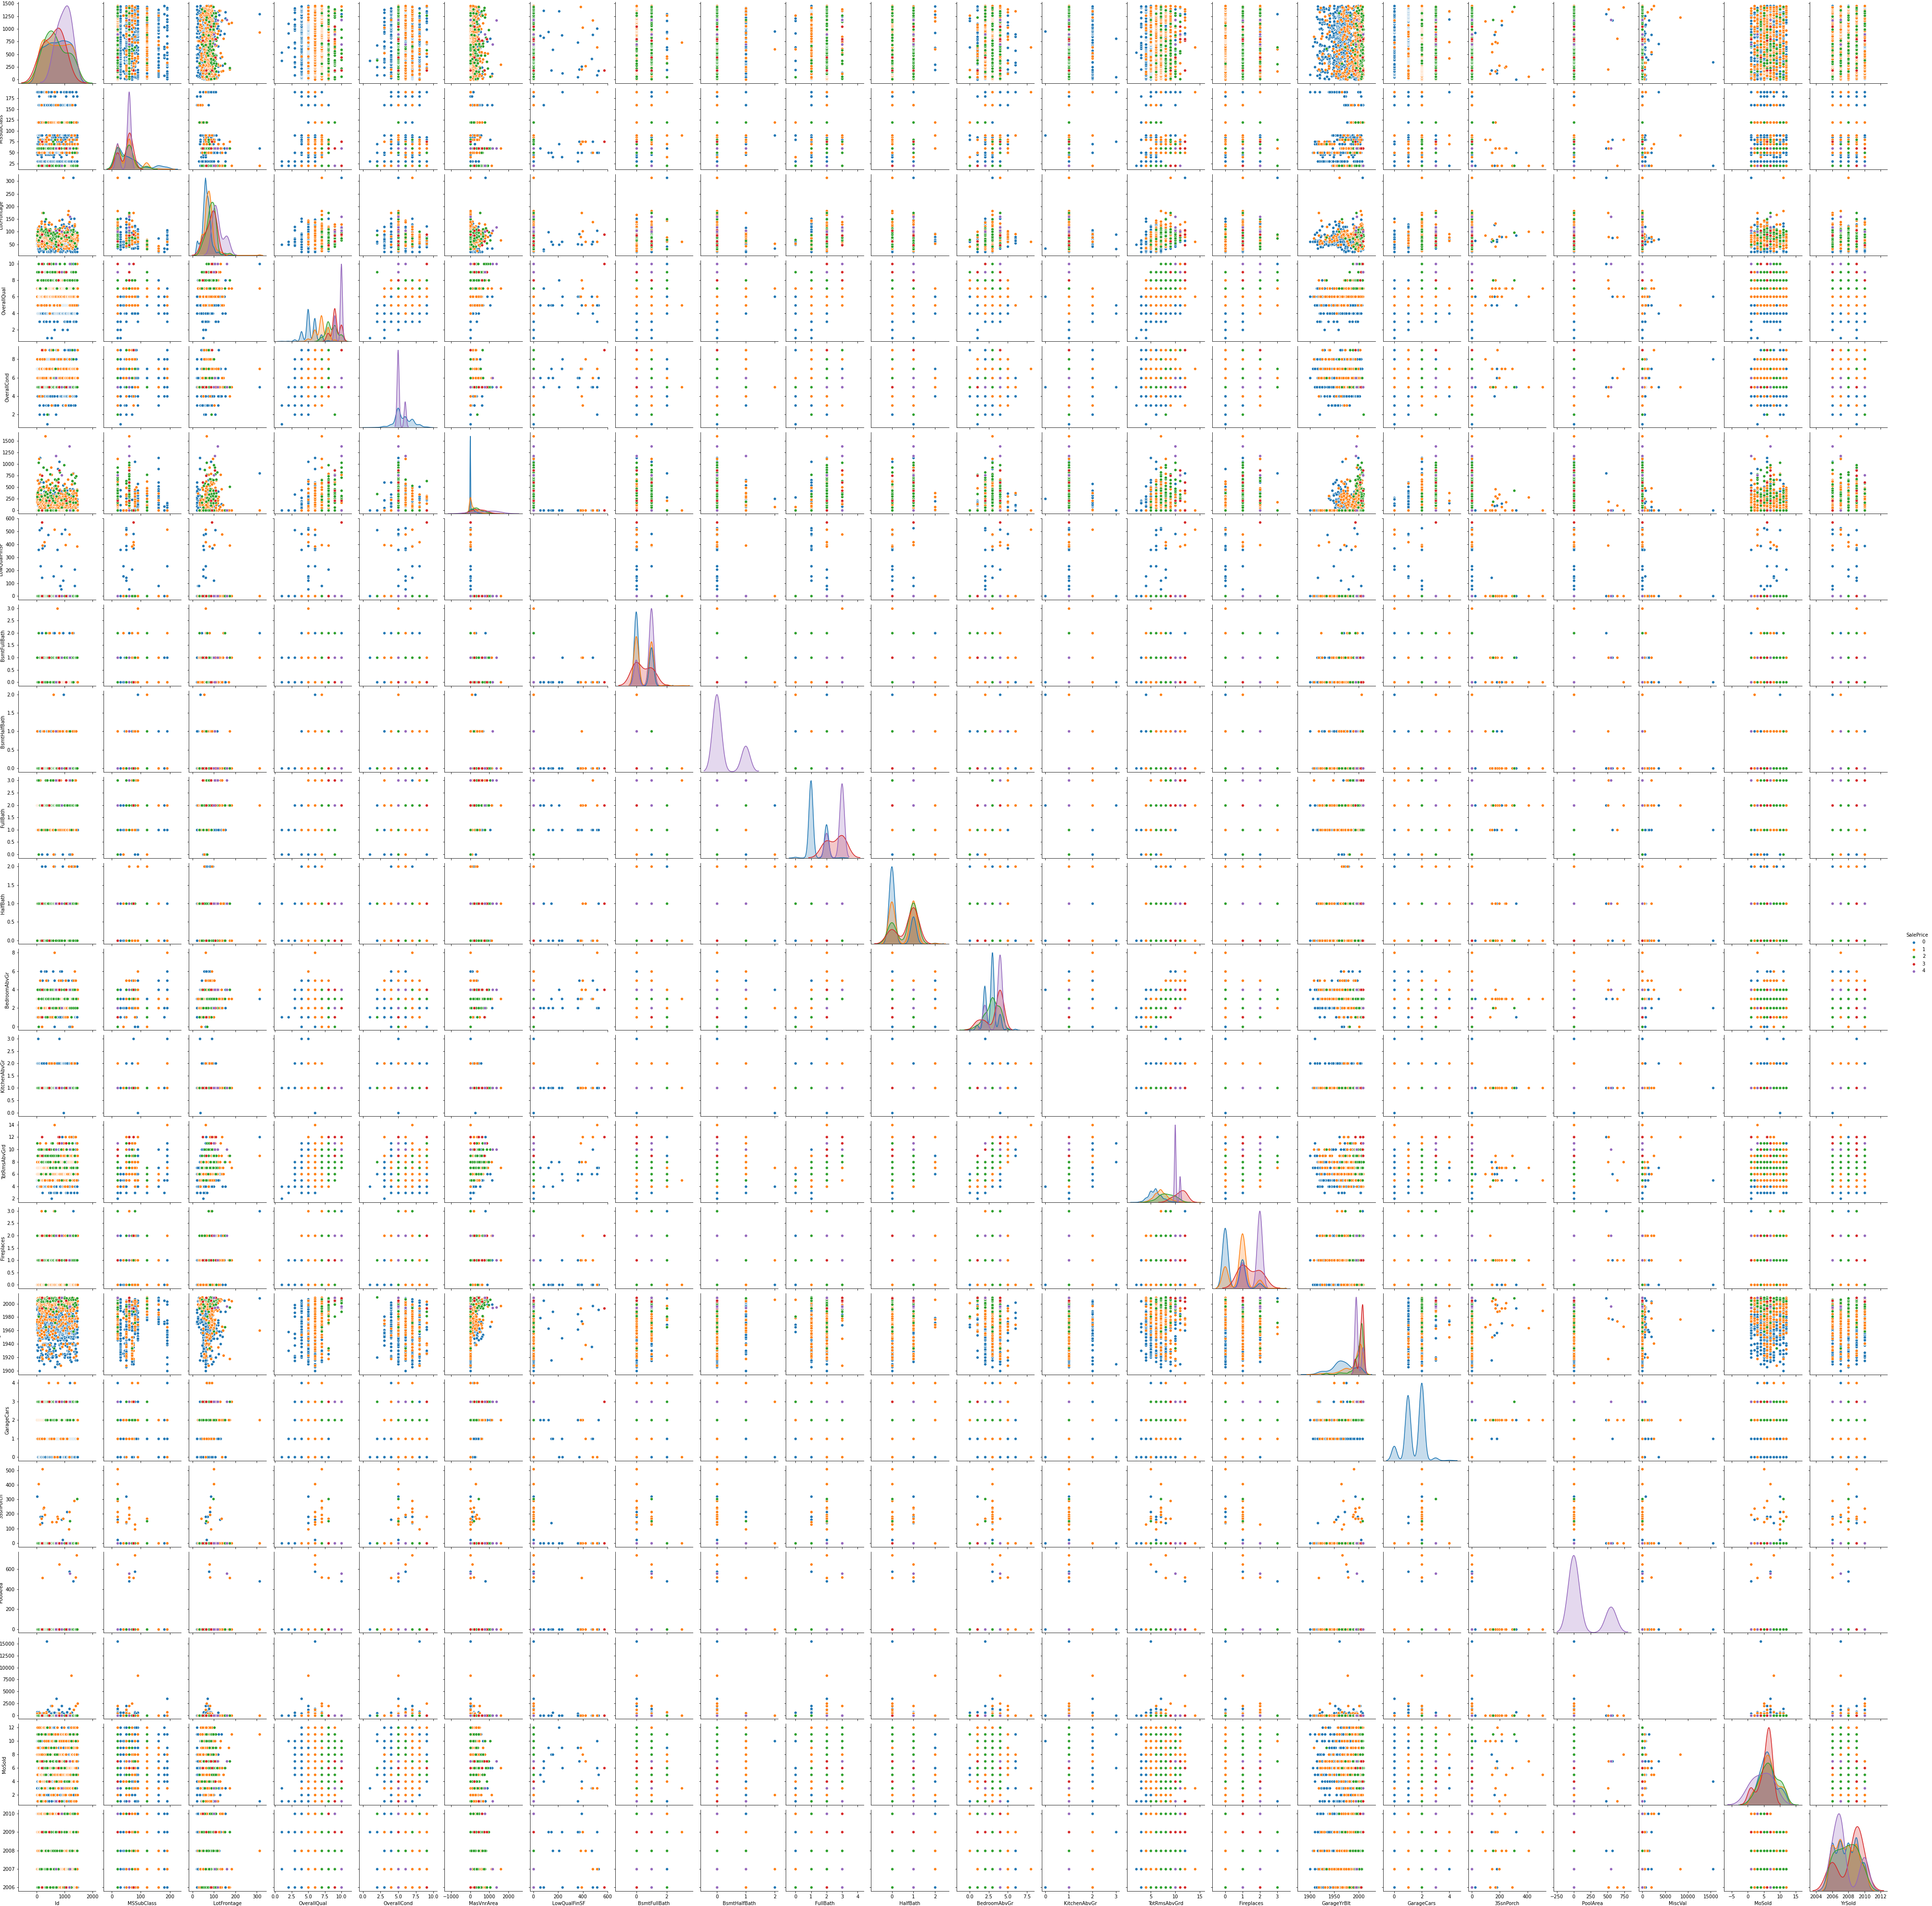

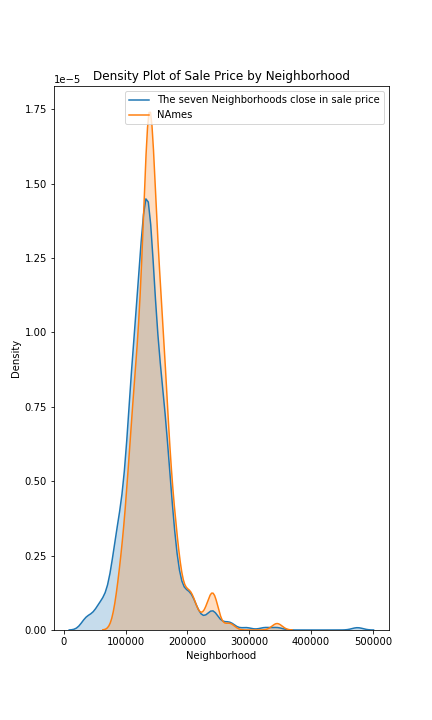

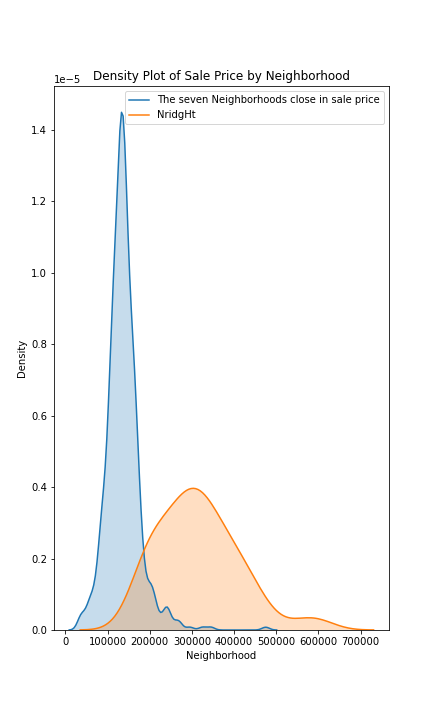

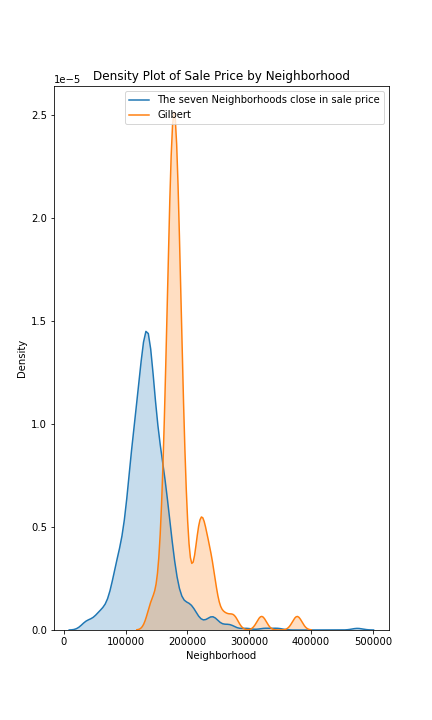

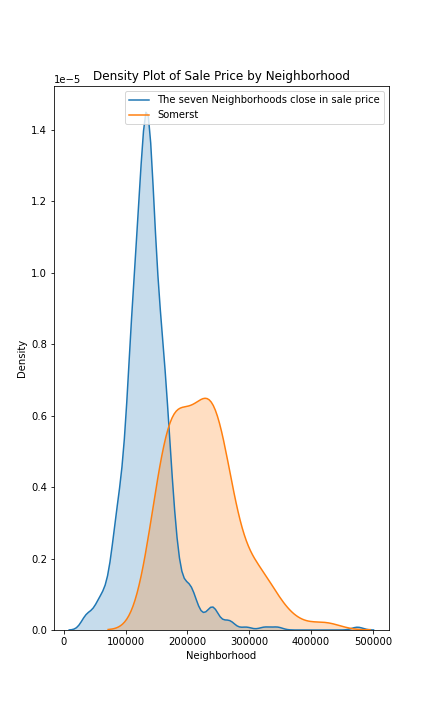

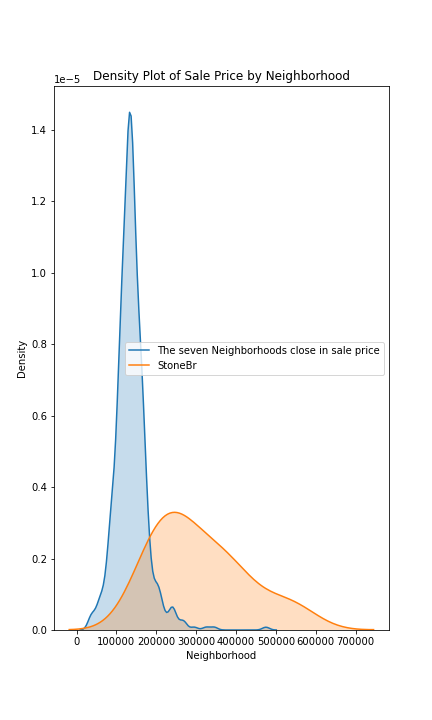

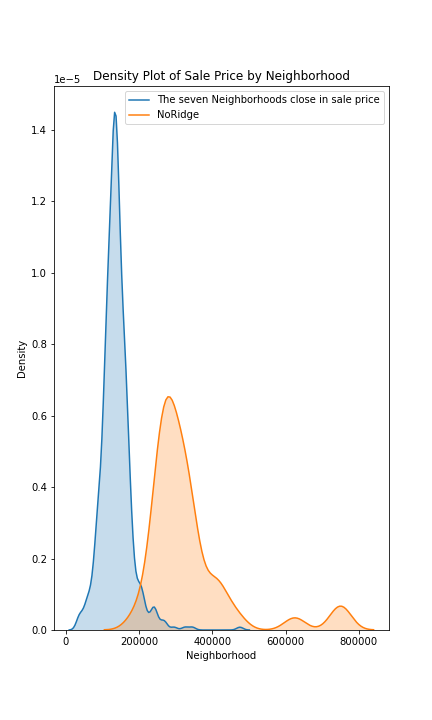

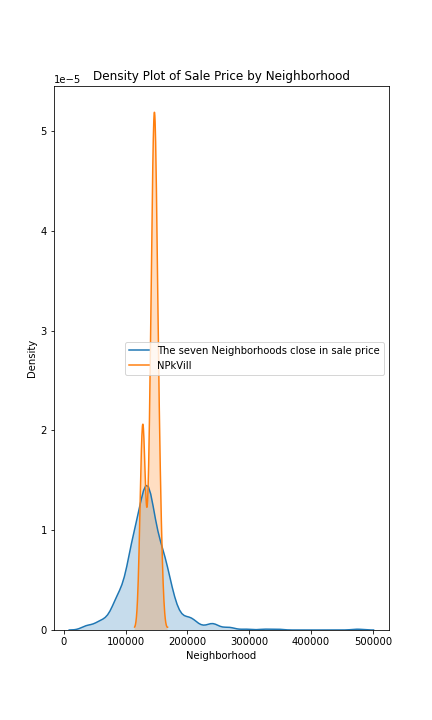

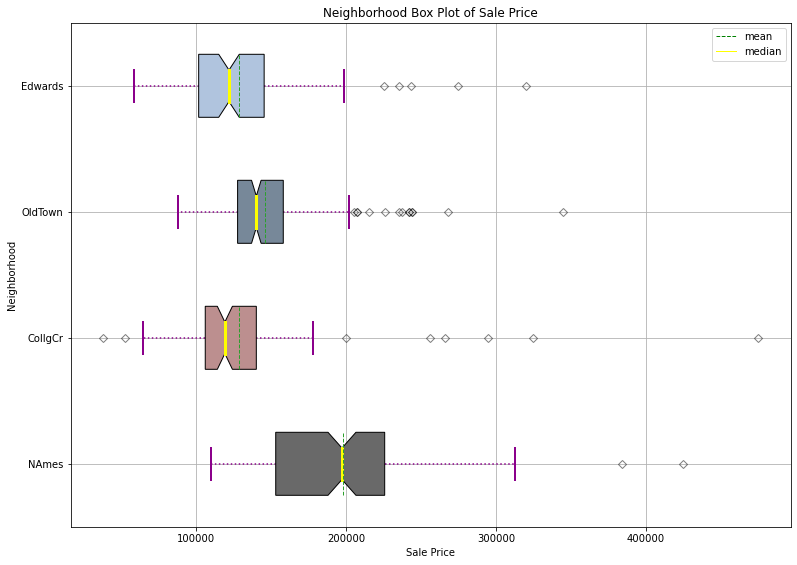

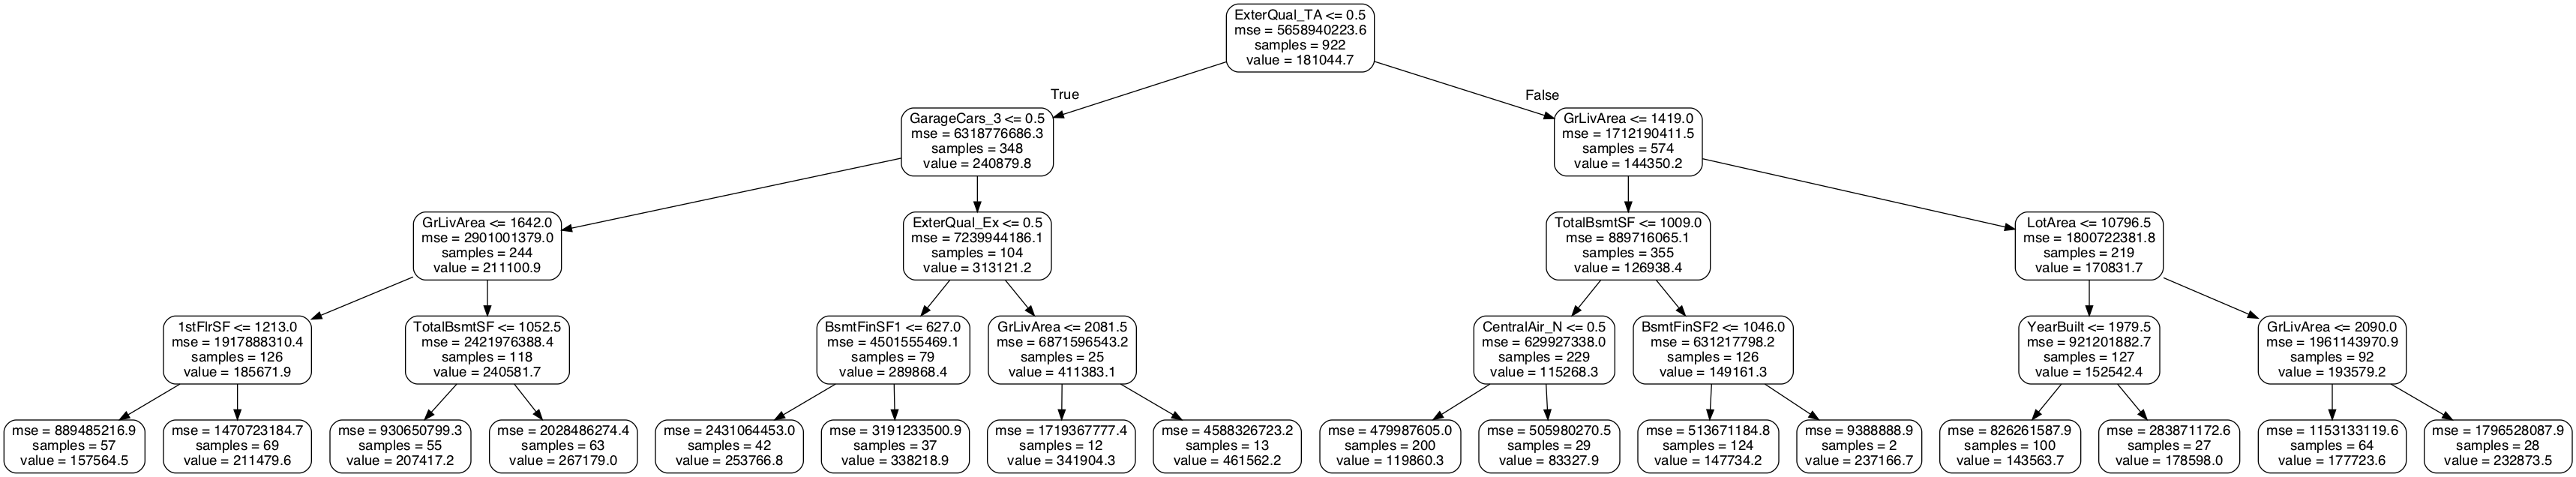

In [156]:
# show what images are saved in the images file
names = [f for f in os.listdir('images/') if f.endswith('.png')]
print(os.listdir())
for name in names:
   display(Image('images/' + name, width=800))

In [86]:
def hello_world():
    return 'Hello World'

In [87]:
hello_world()

In [88]:
# defining and setting variables used in fuctions below

replace_na_col = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
                  'GarageQual', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageYrBlt',
                  'GarageQual', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1',
                  'BsmtFinType2'
                 ]
fields_to_drop = ['LotFrontage', 'GarageYrBlt', 'Utilities', 'Street', 'GarageArea',
                      'YearRemodAdd', 'BsmtFinSF1', 'ScreenPorch', 'EnclosedPorch', 'Alley',
                      'Utilities', 'SaleType', '3SsnPorch', 'Exterior1st', 'Exterior2nd',
                      'Condition1', 'Condition2', 'PoolArea', 'Functional', 'RoofMatl',
                      'RoofStyle', 'Electrical', 'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2',
                      'PoolQC', 'HeatingQC', 'BsmtExposure', 'PoolQC', 'BsmtUnfSF', 
                      'SaleCondition', 'LotConfig', 'TotalBsmtSF', 'MSSubClass', 'LowQualFinSF',
                      'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'WoodDeckSF', 'LandSlope',
                      'WoodDeckSF'
                     ]
fields_to_drop_sm = ['LotFrontage', 'GarageYrBlt']

num_ = 20

# parameters - quick or full version (quick was used while testing, but after cleaning data, time wasn't changed much from full)
quick_ = False
if quick_:
    rf_classifier = RandomForestClassifier(
                      min_samples_leaf=2,
                      min_samples_split=10,
                      n_estimators=700,
                      bootstrap=True,
                      oob_score=True,
                      n_jobs=-1,
                      random_state=22,
                      max_depth=2,
                      max_features=5)
else:
    rf_classifier = RandomForestClassifier(
                      min_samples_leaf=2,
                      min_samples_split=10,
                      n_estimators=1700,
                      bootstrap=True,
                      oob_score=True,
                      n_jobs=-1,
                      random_state=22,
                      max_depth=4,
                      max_features=5)

FOUR_NEIGHBORHOODS = ['NAmes', 'CollgCr', 'OldTown', 'Edwards']

agg_setup = ({k:'count', 'SalePrice_real': ['mean', 'median', 'min', 'max', 'std'], 'SalePrice': sc_mode})
agg_setup_raw = ({k:'count', 'SalePrice': ['mean', 'min', 'max', 'std'], 'SalePrice': sc_mode})

In [89]:
def unique_counts (df):
    ret = []
    ret = pd.DataFrame.from_records([(col, df[col].nunique(), df[col].dtype) for col in df.columns],
                          columns=['Column', 'Num_Unique', 'type']).sort_values(by=['Num_Unique'])
    return ret

def convert_to_cat(df, type_):
    unique_ = unique_counts(df)
    for col in unique_['Column'].loc[unique_['Num_Unique']<20]:
        if df[col].dtype == type_:
            df[col] = df[col].astype('str').astype('category')
    for col in unique_['Column'].loc[unique_['Num_Unique']>=20]:
        if df[col].dtype == type_:
            df[col] = pd.qcut(df[col], 6, duplicates='drop')
            df[col] = df[col].astype('str').astype('category')
    return df


def change_missing(df, col_=replace_na_col, val='NA'):
    df[col_] = df[col_].replace({np.nan: val})
    return df

def cond_condense_rooms(cond_, expand=True):
        cond_ = int(cond_)
        if expand:
            return cond_
        if cond_ < 3:
            return 1
        if cond_ < 5:
            return 2
        if cond_ < 10:
            return 3
        else:
            return 0
        
def cond_tot_rooms(cond_, expand=True):
    cond_ = int(cond_)
    if expand:
        return cond_
    if cond_ < 5:
        return 1
    if cond_ < 7:
        return 2
    if cond_ < 10:
        return 3
    else:
        return 4    

def qu_condense(cond_, expand=True):
    if expand:
        if cond_ == 'Ex':
            return 4
        elif cond_ == 'Gd':
            return 3
        elif cond_ == 'TA':
            return 2
        elif cond_ == 'Fa':
            return 1
        else:
            return 0
    else:
        if cond_ in ['Ex', 'Gd']:
            return 3
        if cond_ == 'TA':
            return 2
        if cond_ in ['Fa', 'Po']:
            return 1
        else:
            return 0

def cond_condenser(cond_, expand=True):
    cond_ = int(cond_)
    if expand:
        return cond_
    if cond_ < 3:
        return 1
    elif cond_ < 6:
        return 2
    elif cond_ < 7:
        return 3
    elif cond_ <9:
        return 4
    elif cond_ < 11:
        return 5
    else:
        return 0

def encode_and_bind(original_dataframe, features_to_encode):
    dummies = pd.get_dummies(original_dataframe[features_to_encode])
    res = pd.concat([dummies, original_dataframe], axis=1)
    res = res.drop(features_to_encode, axis=1)
    return(res)

def by_cat_dist_plot(data_column, name_):
    ax=data_column.value_counts().plot(kind = 'bar',  
                                                  figsize=(9,6)) 
    ax.set_title(name_, fontname='Comic Sans MS', fontsize=20)    
    

def top_feature_plot(feature_imp_ranked_, num=num_):    
    feature_names_ = [i[0] for i in feature_imp_ranked_[:num]]
    y_ticks = np.arange(0, len(feature_names_))
    x_axis = [i[1] for i in feature_imp_ranked_[:num]]
    plt.figure(figsize = (10, 10))
    plt.barh(feature_names_, x_axis)   #horizontal barplot
    plt.title('Random Forest Feature Importance',
              fontdict= {'fontname':'Comic Sans MS','fontsize' : 20})
    plt.xlabel('Features',fontdict= {'fontsize' : 16})
    plt.show()  
    
def feature_imp_lst(enc_, imp_, num=num_):
    feature_importances_ = list(zip(enc_, imp_))    
    feature_importances_ranked_ = sorted(feature_importances_, key = lambda x: x[1], reverse = True)
    [print('Feature: {:35} Importance: {}'.format(*pair)) for pair in feature_importances_ranked_[:num]]; 
    return feature_importances_ranked_

def sum_dict(dict_):
    return {k: sum(v) for k,v in dict_.items()}

def sort_dict(dict_):
    return {k: dict_[k] for k in sorted(dict_, key=dict_.get, reverse=True)}


def rolling_mean(df_col):
    return df_col.rolling_mean(window=90).mean()


def get_plot(neighborhoods_=FOUR_NEIGHBORHOODS):
    for i, neigh_ in enumerate(neighborhoods_):
        df_ = (four_neigh_group.loc[four_neigh_group['Neighborhood']==neigh_]
                .groupby(['Date']).agg({'SalePrice_real': 'mean'}).round().reset_index()
              )
        df_['Rolling_60'] = df_.rolling(4).mean().shift(-2)        
        plt.plot(df_['Rolling_60'],
            label=neigh_,
            color = colors[i],
            linewidth=3)

#Load The Data

<a name='loadData' />

In [90]:
# create a setup function that gets the data in the structure I need
def data_load():
    ''' Basic data load and setup. Just loading one of the files - train.csv, splitting
    into a train_x and train_y. Bin some of the data and delete a bunch of the columns
    that after many iterations, didn't need to be included. All data becomes category data
    '''
    import pandas as pd
    train = pd.read_csv('data/train.csv')
    train_x = train.iloc[:,:-1].drop('Id', axis=1)
    fields_ = ['MasVnrArea', 'Electrical', 'MSZoning', 'Functional', 'Utilities']
    
    val_ = []
    for f in (fields_):
        train_x[f] = train_x[f].fillna(train_x[f].mode()[0])       
    train_y = train.iloc[:,-1]
    train_x = change_missing(train_x)  
    # bin y
    bin_ = (np.linspace(0, 800000, 32))
    y_cat_type = pd.CategoricalDtype(categories=list(range(0,len(bin_)-1)), ordered=True)
    train_y = pd.cut(train_y, bins=bin_, labels=list(range(0,len(bin_)-1))).astype(y_cat_type)
       
    for col_ in ['FireplaceQu', 'KitchenQual', 'BsmtCond', 'ExterCond', 'ExterCond',
                 'BsmtQual', 'GarageCond', 'GarageQual']:
        train_x[col_] = train_x[col_].apply(lambda x: qu_condense(x))  
    train_x['OverallCond'] = train_x['OverallCond'].apply(lambda x: cond_condenser(x))
    train_x['OverallQual'] = train_x['OverallQual'].apply(lambda x: cond_condenser(x))
    train_x['BedroomAbvGr'] = train_x['BedroomAbvGr'].apply(lambda x: cond_condense_rooms(x))
    train_x['TotRmsAbvGrd'] = train_x['TotRmsAbvGrd'].apply(lambda x: cond_tot_rooms(x))   
    for col in train_x:
        if train_x[col].dtype == 'object':
            train_x[col] = train_x[col].astype('str').astype('category')
    # bin the data
    train_x['LotShape'] = train_x['LotShape'].apply(lambda x: '1' if x == 'Reg' else '0')
    train_x = convert_to_cat(train_x, 'int64')
    train_x = convert_to_cat(train_x, 'float64')
    train_x = train_x.drop(fields_to_drop, axis=1)
    return train_x, train_y, train


In [145]:
# using the data_load function to get the data as I need it for this part of the project
train_x, train_y, train_raw = data_load()
train_x.to_pickle('data/train_x.pkl')
train_y.to_pickle('data/train_y.pkl')
train_raw.to_pickle('data/train_raw.pkl')

In [92]:
# Finding the Neighborhoods with the highest number of counts
# will take top 3 neighborhoods and will do all neighborhoods including top 3
train_x.groupby('Neighborhood')['OverallCond'].count().sort_values(ascending=False).head(15).reset_index()

In [93]:
# looking at the number of unique values per category
pd.DataFrame.from_records([(col, train_x[col].nunique()) for col in train_x.columns],
                          columns=['Column', 'Num_Unique']).sort_values(by=['Num_Unique'])

from the random grid search these are the parameters that were selected

<p>{'n_estimators': 1700,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_leaf_nodes': 36,
 'max_features': 0.2,
 'max_depth': 4,
 'bootstrap': True}</p>

In [147]:
'''making copy of the train_x data so I don't change it during this process - also adding
the saleprice back in so that when I group data it will all be matched'''

train_xy=train_x.copy()
train_xy['SalePrice'] =train_y
train_xy

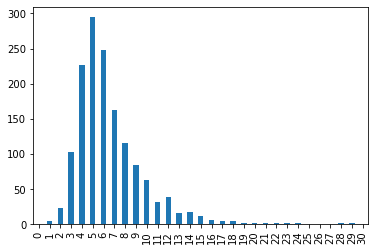

In [148]:
#Quick chart to show the sale price bins and frequency
#each bin is about an extra $20,000 starting from $0
train_xy['SalePrice'].value_counts().sort_index().plot(kind = 'bar')

/Users/paulsprouse/opt/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


NAmes
 There are 177 features in total
Feature: Heating_OthW                        Importance: 0.02956587138158895
Feature: BsmtQual_3                          Importance: 0.029477192888448682
Feature: BedroomAbvGr_5                      Importance: 0.027303171473419895
Feature: HouseStyle_SFoyer                   Importance: 0.026181495772623242
Feature: TotRmsAbvGrd_5                      Importance: 0.02532321237926328
Feature: HouseStyle_SLvl                     Importance: 0.023892180831079628
Feature: BedroomAbvGr_1                      Importance: 0.02330697853992047
Feature: TotRmsAbvGrd_4                      Importance: 0.022407916503779678
Feature: YearBuilt_(1871.999, 1940.0]        Importance: 0.020415927127071427
Feature: TotRmsAbvGrd_14                     Importance: 0.01885066028645889
Feature: HouseStyle_2Story                   Importance: 0.018768795973290408
Feature: OverallCond_9                       Importance: 0.017630566615664266
Feature: OverallCond_2       

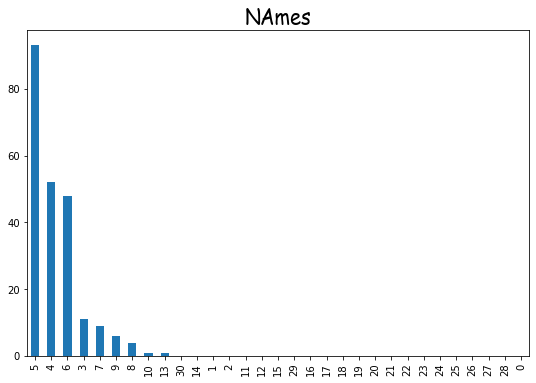

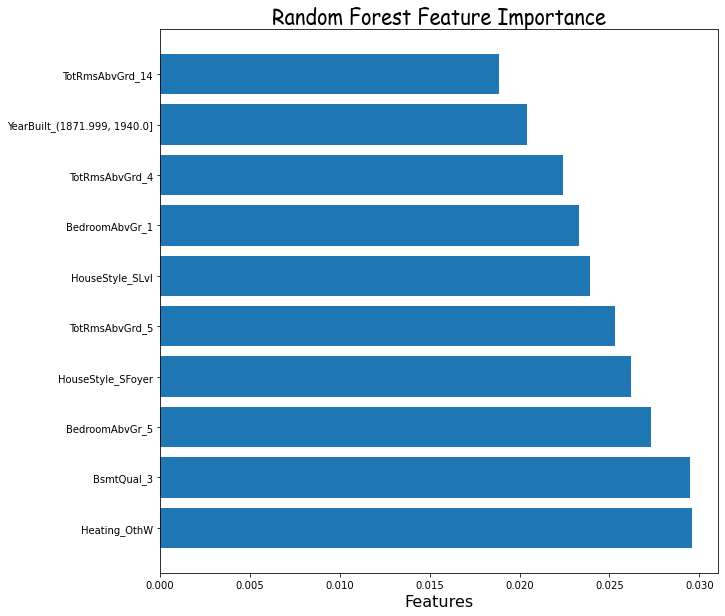

/Users/paulsprouse/opt/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


OldTown
 There are 175 features in total
Feature: OverallQual_10                      Importance: 0.023977949122136546
Feature: BedroomAbvGr_4                      Importance: 0.023174167383925397
Feature: BedroomAbvGr_5                      Importance: 0.019217023535005498
Feature: Heating_Grav                        Importance: 0.01901487115956439
Feature: BedroomAbvGr_8                      Importance: 0.018548512001556838
Feature: TotRmsAbvGrd_5                      Importance: 0.016564942306536136
Feature: BsmtCond_1                          Importance: 0.016361068860539667
Feature: 2ndFlrSF_(-0.001, 600.0]            Importance: 0.015478337810871228
Feature: MasVnrType_BrkFace                  Importance: 0.015213761265303981
Feature: 1stFlrSF_(1535.833, 4692.0]         Importance: 0.015084437061998943
Feature: HalfBath_2                          Importance: 0.015005911370874049
Feature: 1stFlrSF_(333.999, 816.0]           Importance: 0.014728721133710885
Feature: Heating_Wall   

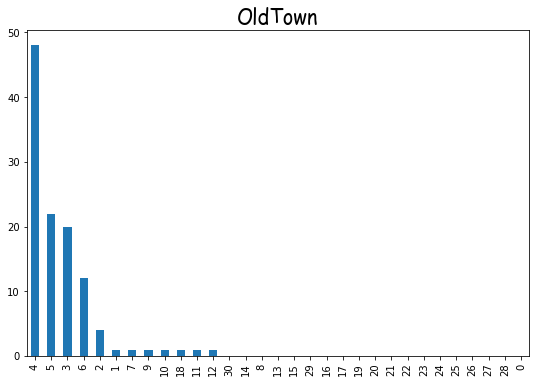

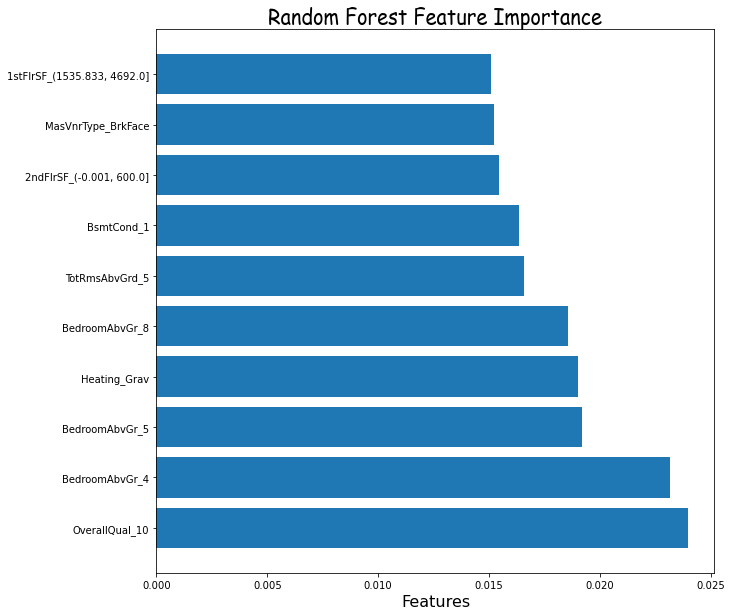

/Users/paulsprouse/opt/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Sawyer
 There are 150 features in total
Feature: GarageType_Attchd                   Importance: 0.030088320706739963
Feature: 2ndFlrSF_(846.0, 2065.0]            Importance: 0.027939189342817673
Feature: GrLivArea_(1464.0, 1664.667]        Importance: 0.027486531892228702
Feature: Foundation_Stone                    Importance: 0.025470595819918423
Feature: GrLivArea_(1958.0, 5642.0]          Importance: 0.020923394266854526
Feature: BsmtQual_3                          Importance: 0.02065649483324854
Feature: GarageType_2Types                   Importance: 0.020167697306218257
Feature: GrLivArea_(1026.0, 1242.667]        Importance: 0.018682483634408453
Feature: BsmtQual_0                          Importance: 0.01815950192311216
Feature: YearBuilt_(1973.0, 1994.0]          Importance: 0.01712064470146506
Feature: OverallQual_4                       Importance: 0.016843304552976928
Feature: FireplaceQu_2                       Importance: 0.01668303314497069
Feature: FireplaceQu_0      

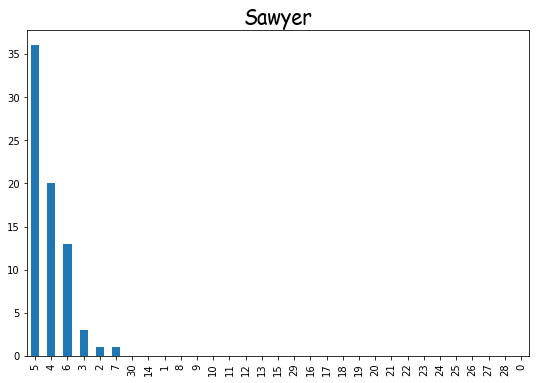

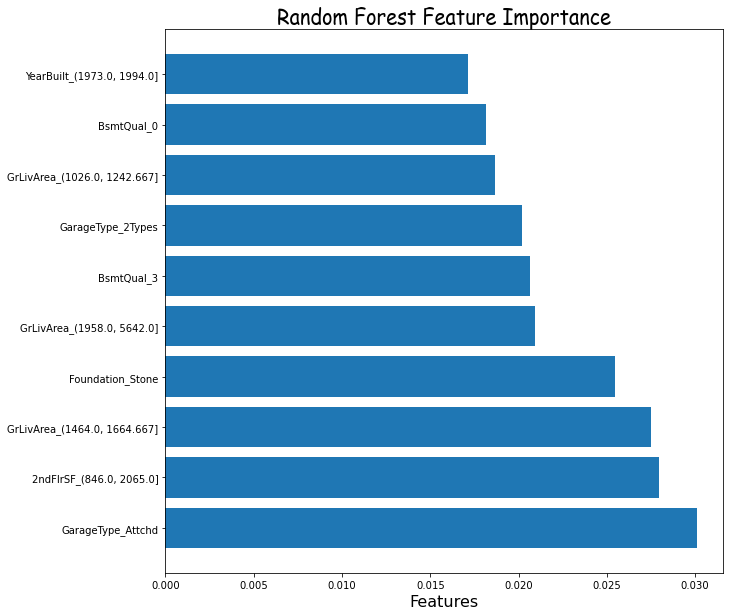

/Users/paulsprouse/opt/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


BrkSide
 There are 158 features in total
Feature: BldgType_TwnhsE                     Importance: 0.036335124086062445
Feature: BsmtCond_0                          Importance: 0.0331857261880945
Feature: BsmtCond_3                          Importance: 0.026198730848175374
Feature: GrLivArea_(333.999, 1026.0]         Importance: 0.020104133570127417
Feature: BsmtQual_0                          Importance: 0.019334814022749416
Feature: Foundation_BrkTil                   Importance: 0.017326236891810388
Feature: HouseStyle_2.5Unf                   Importance: 0.015631902980157906
Feature: KitchenAbvGr_2                      Importance: 0.015358231330899742
Feature: KitchenAbvGr_1                      Importance: 0.01470891939264693
Feature: GarageFinish_RFn                    Importance: 0.014621245051306976
Feature: BldgType_Duplex                     Importance: 0.014563631872112568
Feature: ExterCond_0                         Importance: 0.014554797102020718
Feature: LandContour_Lvl  

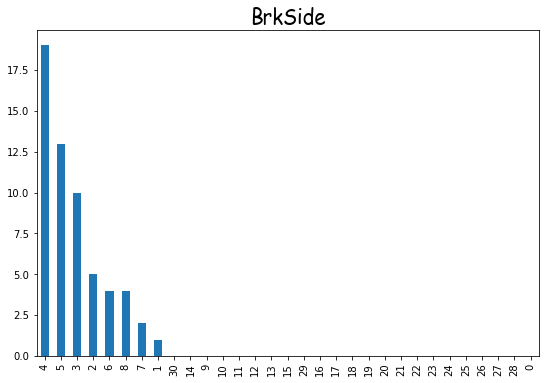

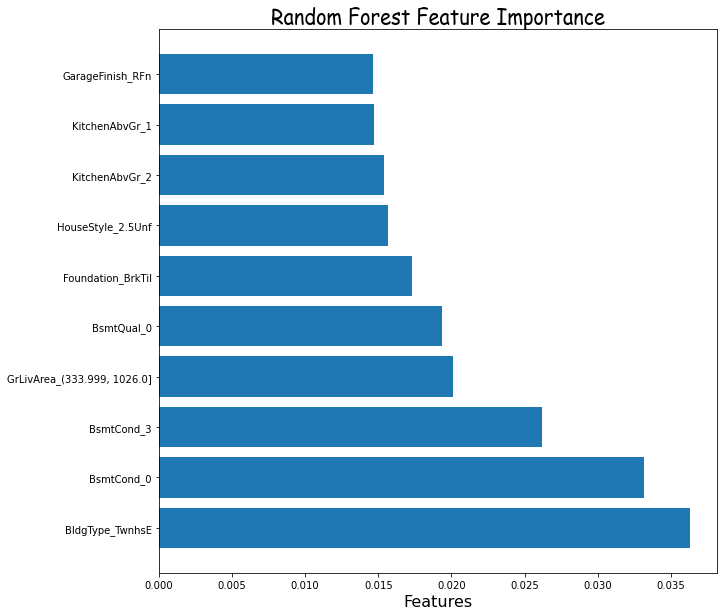

/Users/paulsprouse/opt/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Mitchel
 There are 154 features in total
Feature: ExterQual_TA                        Importance: 0.033384989394304246
Feature: TotRmsAbvGrd_12                     Importance: 0.02637026924337687
Feature: OverallCond_6                       Importance: 0.025984454341981537
Feature: OverallCond_8                       Importance: 0.02566100201565683
Feature: GrLivArea_(1664.667, 1958.0]        Importance: 0.02459412570421219
Feature: BsmtCond_1                          Importance: 0.023369972170565554
Feature: GrLivArea_(1464.0, 1664.667]        Importance: 0.019704632534435326
Feature: BsmtCond_2                          Importance: 0.019219364979659283
Feature: OverallCond_5                       Importance: 0.017116015463286345
Feature: HouseStyle_SFoyer                   Importance: 0.017102938313790336
Feature: 1stFlrSF_(816.0, 948.333]           Importance: 0.01653140722466219
Feature: 2ndFlrSF_(600.0, 846.0]             Importance: 0.01628223843229707
Feature: BsmtCond_3         

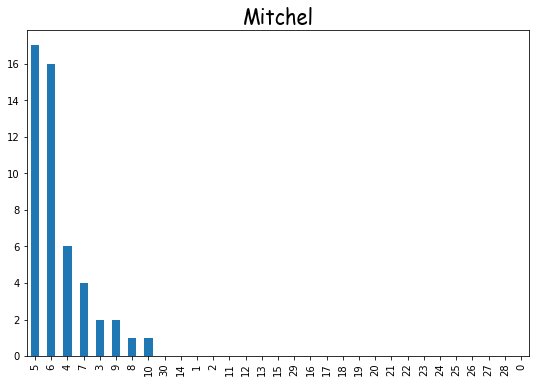

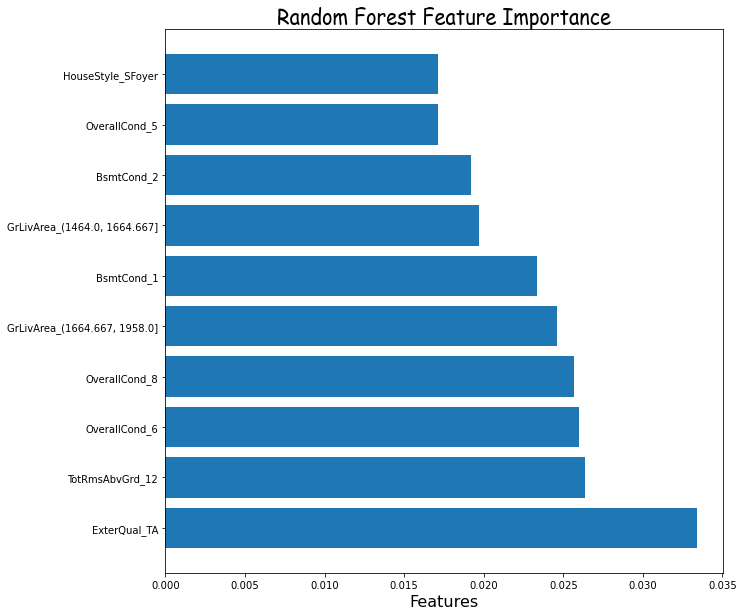

/Users/paulsprouse/opt/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


IDOTRR
 There are 148 features in total
Feature: Foundation_PConc                    Importance: 0.023862609116610978
Feature: Foundation_Slab                     Importance: 0.023821009680774535
Feature: Foundation_CBlock                   Importance: 0.02263149391745672
Feature: MasVnrArea_(-0.001, 93.333]         Importance: 0.020887809032513943
Feature: KitchenAbvGr_2                      Importance: 0.020682978404680707
Feature: ExterQual_Fa                        Importance: 0.020539372850214316
Feature: HouseStyle_1.5Fin                   Importance: 0.02036891576795458
Feature: KitchenAbvGr_0                      Importance: 0.017857888353182454
Feature: ExterQual_Ex                        Importance: 0.017819788115285732
Feature: 1stFlrSF_(1535.833, 4692.0]         Importance: 0.0175045161197985
Feature: OverallQual_5                       Importance: 0.017370040168437025
Feature: 1stFlrSF_(1266.0, 1535.833]         Importance: 0.016874941483217328
Feature: Fireplaces_3       

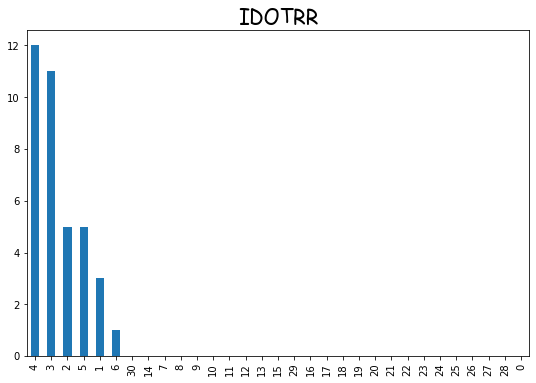

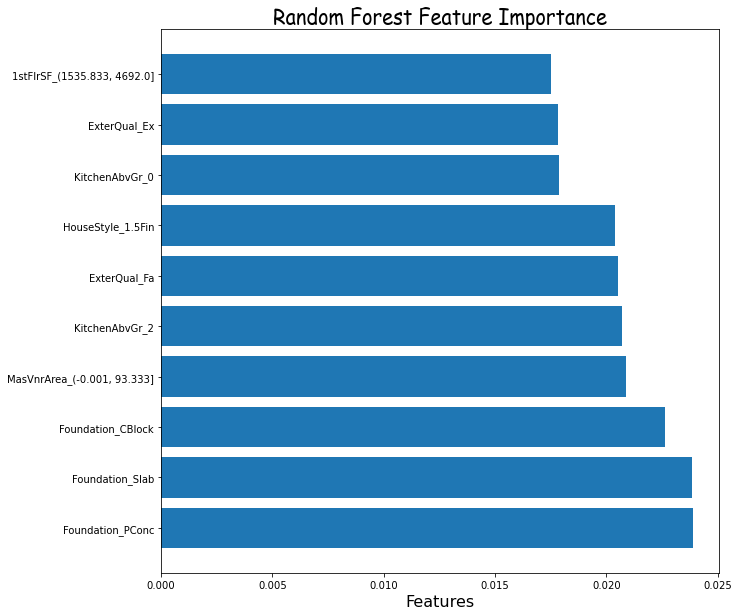

/Users/paulsprouse/opt/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


SWISU
 There are 139 features in total
Feature: CentralAir_Y                        Importance: 0.0315366461612986
Feature: MasVnrArea_(-0.001, 93.333]         Importance: 0.025854179176179035
Feature: ExterCond_0                         Importance: 0.02369739558749525
Feature: MasVnrArea_(243.833, 1600.0]        Importance: 0.022725292543542202
Feature: MasVnrType_nan                      Importance: 0.0226626814181208
Feature: 1stFlrSF_(1535.833, 4692.0]         Importance: 0.02262772246731258
Feature: FullBath_3                          Importance: 0.02198246502452432
Feature: YearBuilt_(1973.0, 1994.0]          Importance: 0.019732092649842596
Feature: FullBath_1                          Importance: 0.019141673258607553
Feature: BsmtCond_3                          Importance: 0.01846295594017363
Feature: 2ndFlrSF_(600.0, 846.0]             Importance: 0.018145531408609226
Feature: Foundation_BrkTil                   Importance: 0.017546904163295223
Feature: CentralAir_N            

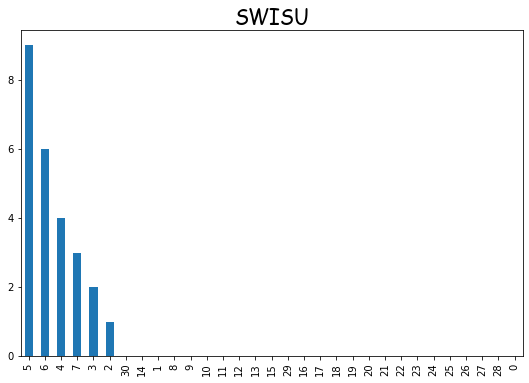

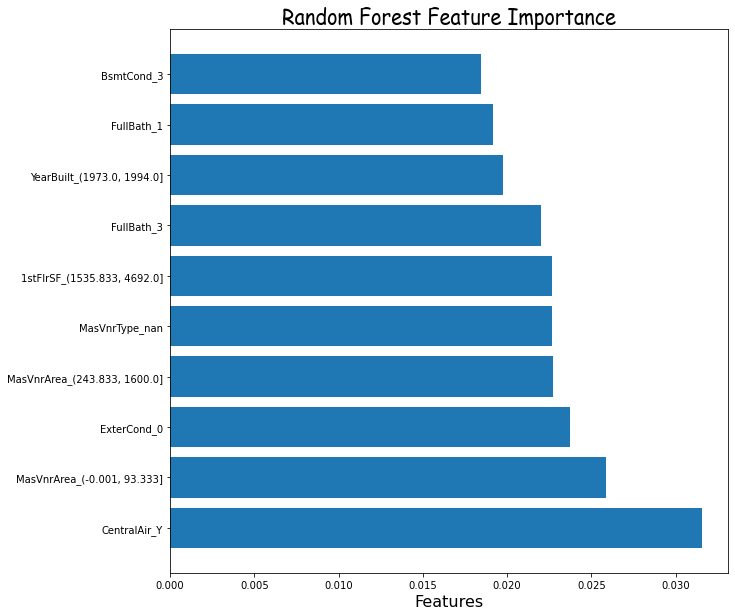

/Users/paulsprouse/opt/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


ALL
 There are 201 features in total
Feature: Fireplaces_0                        Importance: 0.031764391680687384
Feature: GrLivArea_(1464.0, 1664.667]        Importance: 0.02534954912475386
Feature: TotRmsAbvGrd_6                      Importance: 0.024245214140187217
Feature: FireplaceQu_2                       Importance: 0.0231449268570749
Feature: GarageFinish_RFn                    Importance: 0.020991426895931982
Feature: MasVnrType_None                     Importance: 0.019979877186937823
Feature: GarageFinish_NA                     Importance: 0.018585717058572267
Feature: OverallQual_4                       Importance: 0.01821152108267494
Feature: HalfBath_2                          Importance: 0.017200778732034763
Feature: LotArea_(1299.999, 6405.0]          Importance: 0.017059473227708656
Feature: TotRmsAbvGrd_7                      Importance: 0.016818599871256376
Feature: MasVnrType_Stone                    Importance: 0.016697322790847152
Feature: TotRmsAbvGrd_14       

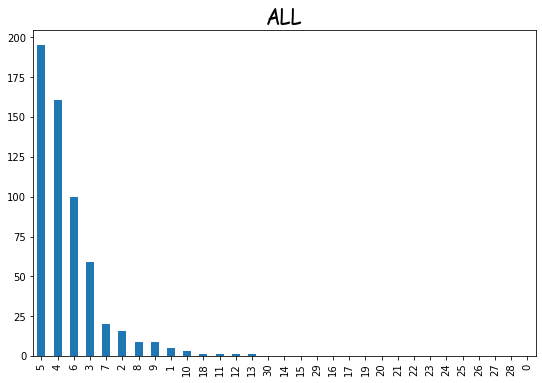

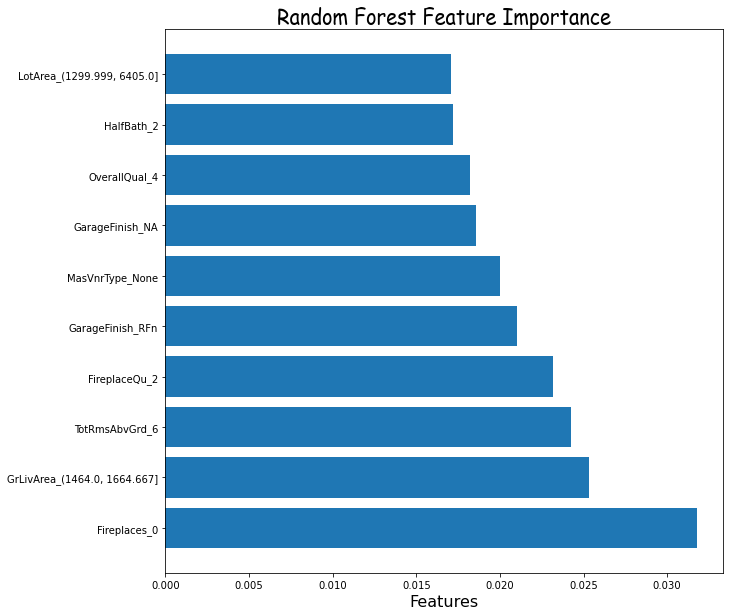

In [153]:
# declare dictionare that gets created of features
cat_t = {}
top_features = []
top_ = ['NAmes', 'CollgCr', 'OldTown', 'ALL']#, 'Edwards', 'Somerst']
top_ = ['NAmes', 'OldTown', 'Sawyer', 'BrkSide', 'Mitchel', 'IDOTRR', 'SWISU', 'ALL']
top_dicts = []
for name in top_:
    if name == 'ALL':
        name_ = train_xy
        name_ = train_xy.loc[train_xy['Neighborhood'].isin(top_)].reset_index(drop=True)
    else:
        name_ = train_xy.loc[train_xy['Neighborhood'] == name].reset_index(drop=True)
    # why I drop the Nieghborhood? it's because so much of the other variables are baked
    # into the neighborhood, that it overfits the data too easily (other option would be to
    # drop other related columns or decrease the weight -)
    t_x = name_.iloc[:,1:].drop(['SalePrice', 'Neighborhood'], axis=1)#'Neighborhood', 
    t_y = name_.iloc[:,-1:]

    col_trans = make_column_transformer(
                        (OneHotEncoder(),t_x.columns.tolist()),
                        remainder = "passthrough"
                        )
    pipe = make_pipeline(col_trans, rf_classifier)
    pipe.fit(t_x, t_y)
    print(name)
    by_cat_dist_plot(t_y['SalePrice'], name)
    #t_y['SalePrice'].value_counts().sort_index().plot(kind = 'bar', title=name, figsize=(9,6))
    print(f" There are {len(rf_classifier.feature_importances_)} features in total")
    X_t_encoded = encode_and_bind(t_x, t_x.columns.tolist())
    feature_importances_ranked_ = feature_imp_lst(X_t_encoded, rf_classifier.feature_importances_)
    top_features.append([name, feature_importances_ranked_])
    top_feature_plot(feature_importances_ranked_, 10)   
# Dictionary of Features and importances greater than .0001
# cat_ dict is all results top_five_dicts is list of dictionaries by neighborhood
    cat_new = {}
    for feat in feature_importances_ranked_[:35]:     
        if feat[1] > 0.0001:
            cat_t.setdefault(feat[0].split(sep='_')[0], []).append(feat[1])
            cat_new.setdefault(feat[0].split(sep='_')[0], []).append(feat[1])
    top_dicts.append(cat_new)

In [154]:
sort_dict(cat_new)

In [155]:
count_=[]
tot_=[]
for val in top_dicts:
    print(val)
    print('*'*100)
    val = sum_dict(val)
    
    for k,v in sort_dict(val).items():
        print(k,v)
        count_.append(k)
    print('*'*100)

{'Heating': [0.02956587138158895, 0.015674498824130474, 0.013063859837685272, 0.011363075282745255], 'BsmtQual': [0.029477192888448682, 0.010941654416575264], 'BedroomAbvGr': [0.027303171473419895, 0.02330697853992047], 'HouseStyle': [0.026181495772623242, 0.023892180831079628, 0.018768795973290408], 'TotRmsAbvGrd': [0.02532321237926328, 0.022407916503779678, 0.01885066028645889, 0.01533757287174798], 'YearBuilt': [0.020415927127071427], 'OverallCond': [0.017630566615664266, 0.016721364499092777, 0.014926958931358375, 0.013766263055514795, 0.013691040111994405], 'KitchenQual': [0.01643910372311314], 'MasVnrArea': [0.01619367399956212], 'FullBath': [0.015981505674615336], 'BsmtCond': [0.015978418190799402], 'HalfBath': [0.015974354843292026], 'KitchenAbvGr': [0.014728329454274205, 0.014034116091773312], 'ExterQual': [0.014195611167252088, 0.01338297641039367], 'CentralAir': [0.013436958904991934, 0.011809427523418535], '1stFlrSF': [0.012105826259692169, 0.010711762532002239], 'LotArea':

In [99]:
train_xy['SalePrice_real']= train_raw['SalePrice']
print(train_xy.groupby('Neighborhood', dropna=True).agg(agg_setup).round())

             OpenPorchSF SalePrice_real                                    \
                   count           mean  median     min     max       std   
Neighborhood                                                                
Blmngtn               17       194871.0  191000  159895  264561   30393.0   
Blueste                2       137500.0  137500  124000  151000   19092.0   
BrDale                16       104494.0  106000   83000  125000   14330.0   
BrkSide               58       124834.0  124300   39300  223500   40349.0   
ClearCr               28       212565.0  200250  130000  328000   50232.0   
CollgCr              150       197966.0  197200  110000  424870   51404.0   
Crawfor               51       210625.0  200624   90350  392500   68866.0   
Edwards              100       128220.0  121750   58500  320000   43209.0   
Gilbert               79       192855.0  181000  141000  377500   35987.0   
IDOTRR                37       100124.0  103000   34900  169500   33377.0   

In [100]:
#val_dict = sum_dict(top_dicts[0:2])
train_xy['SalePrice_real']= train_raw['SalePrice']
train_xy['SalePrice'] = train_y#['SalePrice']

def dict_value_mean(dict_, neigh_):
    for k,v in sort_dict(dict_).items():
        print(neigh_, k, v)
        if neigh_ == 'ALL':
            print(train_xy.groupby(k, dropna=True)
                  .agg(agg_setup).round(0))
            print(train_raw.groupby(k, dropna=True)
                  .agg(agg_setup_raw))           
        else:
            print(train_xy.loc[train_xy['Neighborhood']==neigh_][['Neighborhood','SalePrice_real', k]].groupby(k)
                  .agg({k:'count', 'SalePrice_real': 'mean'}))
            print(train_raw.loc[train_x['Neighborhood']==neigh_][['Neighborhood','SalePrice', k]].groupby(k, dropna=True)
                  .agg({k:'count', 'SalePrice': 'mean'}))
    print('*'*100)

In [101]:
for n in range(0,len(top_)):
    val_dict = sum_dict(top_dicts[n])
    dict_value_mean(val_dict, top_[n])


NAmes TotRmsAbvGrd 0.08191936204124983
              TotRmsAbvGrd  SalePrice_real
TotRmsAbvGrd                              
10                       4   134900.000000
11                       1   242000.000000
12                       2   177150.000000
14                       0             NaN
2                        0             NaN
3                        0             NaN
4                       15   123540.666667
5                       57   129734.789474
6                       94   143401.063830
7                       32   158900.000000
8                       14   190235.714286
9                        6   200650.000000
              TotRmsAbvGrd      SalePrice
TotRmsAbvGrd                             
4                       15  123540.666667
5                       57  129734.789474
6                       94  143401.063830
7                       32  158900.000000
8                       14  190235.714286
9                        6  200650.000000
10                     

          BsmtCond  SalePrice_real
BsmtCond                          
0                0             NaN
1                0             NaN
2              142   199838.647887
3                8   164722.250000
          BsmtCond      SalePrice
BsmtCond                         
Gd               8  164722.250000
TA             142  199838.647887
CollgCr FullBath 0.037142678337018876
          FullBath  SalePrice_real
FullBath                          
0                0             NaN
1               38   137334.210526
2              111   216678.342342
3                1   424870.000000
          FullBath      SalePrice
FullBath                         
1               38  137334.210526
2              111  216678.342342
3                1  424870.000000
CollgCr BldgType 0.03549101744117387
          BldgType  SalePrice_real
BldgType                          
1Fam           140   201858.328571
2fmCon           0             NaN
Duplex           0             NaN
Twnhs            0      

(948.333, 1087.0]         19   118151.578947
          1stFlrSF  SalePrice
1stFlrSF                     
572              1     116900
600              1      37900
624              1      98000
676              1      66500
679              1     120000
...            ...        ...
1576             1     159500
1584             1     256000
1664             1     136000
1675             1     295000
1766             1     160000

[100 rows x 2 columns]
OldTown BsmtCond 0.028811076606817546
          BsmtCond  SalePrice_real
BsmtCond                          
0                2   101625.000000
1                9   137597.666667
2              101   127424.059406
3                1   178000.000000
          BsmtCond      SalePrice
BsmtCond                         
Fa               9  137597.666667
Gd               1  178000.000000
TA             101  127424.059406
OldTown TotRmsAbvGrd 0.027016838914102188
              TotRmsAbvGrd  SalePrice_real
TotRmsAbvGrd                          

         OpenPorchSF SalePrice_real                                    \
               count           mean  median     min     max       std   
FullBath                                                                
0                  9       165201.0  145000   35311  385000  106084.0   
1                650       134751.0  132375   34900  423000   41565.0   
2                768       213010.0  196750   55000  611657   72447.0   
3                 33       347823.0  320000  170000  755000  165185.0   

             SalePrice  
                  mode  
FullBath                
0           ([5], [3])  
1         ([5], [210])  
2         ([6], [144])  
3           ([7], [5])  
          OpenPorchSF         SalePrice
FullBath                               
0                   9    ([35311], [1])
1                 650  ([140000], [14])
2                 768  ([190000], [11])
3                  33   ([170000], [1])
ALL OverallQual 0.06383178424393354
            OpenPorchSF SalePrice_rea

                   OpenPorchSF SalePrice_real                          \
                         count           mean  median     min     max   
1stFlrSF                                                                
(1087.0, 1266.0]           244       178714.0  163000   79900  361919   
(1266.0, 1535.833]         242       204629.0  190000   60000  475000   
(1535.833, 4692.0]         244       269864.0  249850  100000  755000   
(333.999, 816.0]           247       132174.0  128000   34900  269500   
(816.0, 948.333]           240       146633.0  136500   58500  274725   
(948.333, 1087.0]          243       153632.0  140000   55993  339750   

                                SalePrice  
                         std         mode  
1stFlrSF                                   
(1087.0, 1266.0]     56848.0  ([5], [67])  
(1266.0, 1535.833]   68162.0  ([6], [53])  
(1535.833, 4692.0]  106039.0  ([9], [32])  
(333.999, 816.0]     42266.0  ([4], [61])  
(816.0, 948.333]     43210.0  ([4]

/Users/paulsprouse/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


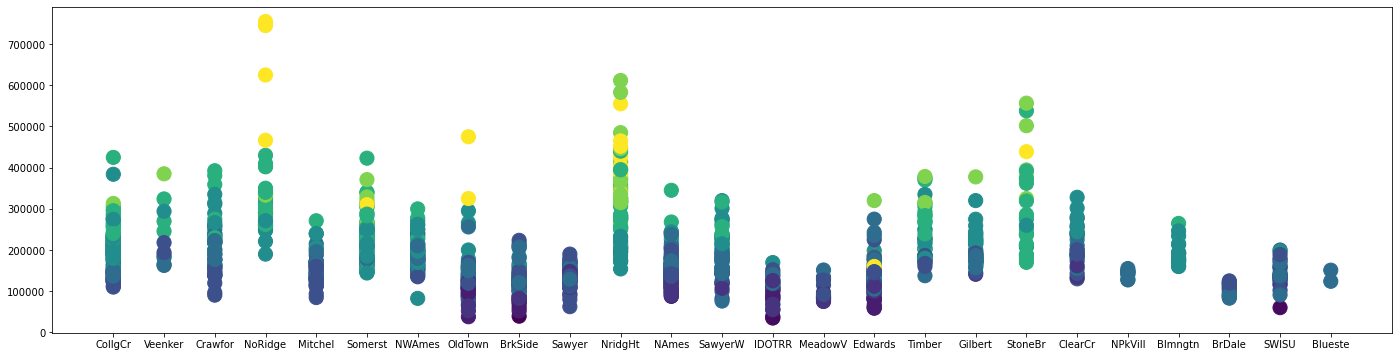

In [130]:
def scal_it(x_):
    return int(x_)**2

scat_data = train_xy[['OverallQual', 'SalePrice_real', 'Neighborhood', 'OverallCond']]
scat_data['Scaled_Overall_Qual'] = scat_data['OverallQual'].apply(lambda x: scal_it(x))
#scat_data['Scaled_Overall_Cond'] = scat_data['OverallCond'].apply(lambda x: 2.25*scal_it(x))
plt.figure(figsize=(24,6))
plt.scatter(data=scat_data, x='Neighborhood',c='Scaled_Overall_Qual', s=200, y='SalePrice_real')#, c='Neighborhood')
#plt.plot(x=plot_scat['OverallQual'], y=plot_scat['SalePrice' ], color=plot_scat['Neighborhood'])


<AxesSubplot:title={'center':'SalePrice_real'}, xlabel='Neighborhood'>

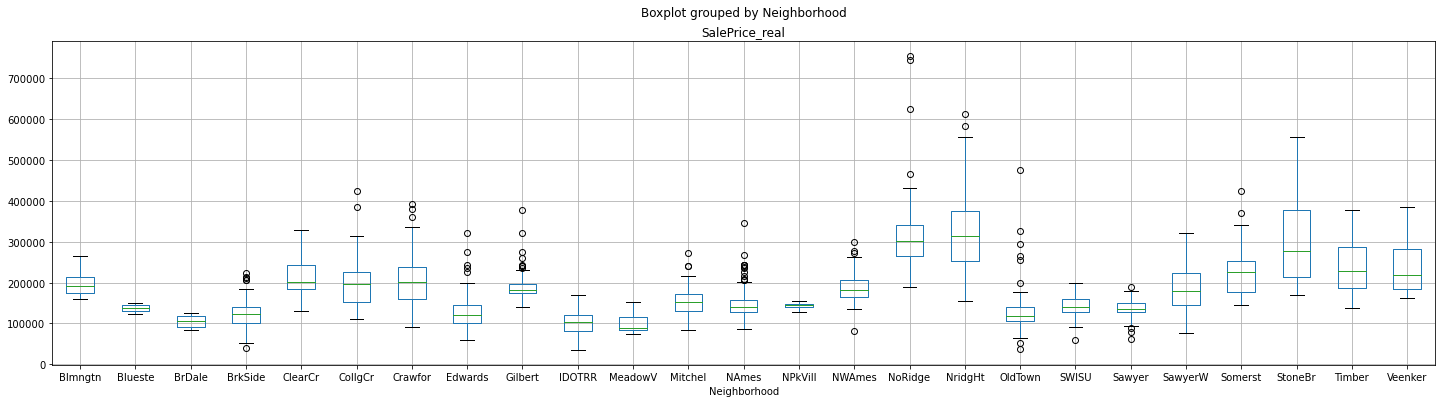

In [49]:
scat_data.boxplot(column='SalePrice_real', by='Neighborhood', figsize=(24,6))

In [51]:
bp_data = scat_data[scat_data['Neighborhood']
                    .isin (FOUR_NEIGHBORHOODS)]
lst=[]
neigh = []
#setup data for the fourneighborhoods
for neigh_ in bp_data['Neighborhood'].unique():
    neigh.append(bp_data.loc[bp_data['Neighborhood']==neigh_]['SalePrice_real'])

/Users/paulsprouse/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


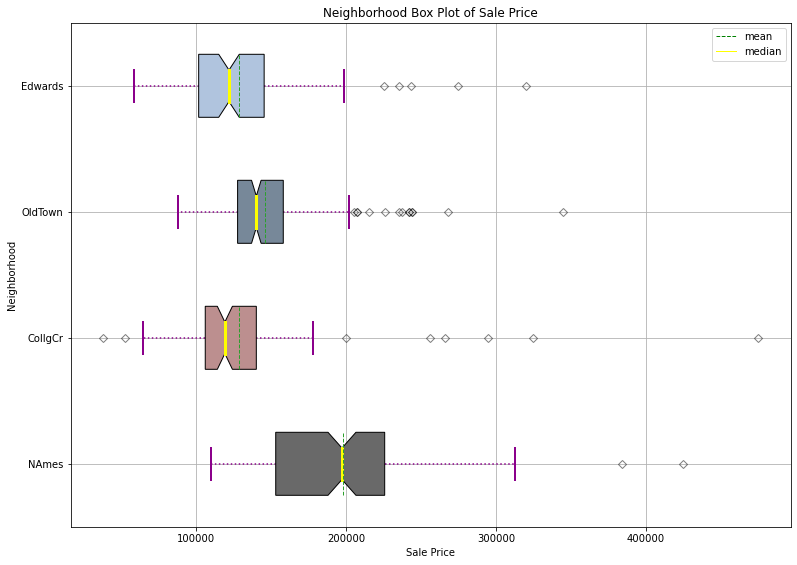

In [59]:
fig, ax = plt.subplots(figsize=(10,7)) 
#ax = fig.add_subplot(111) 
ax = fig.add_axes([0, 0, 1, 1])

bp = ax.boxplot(neigh, patch_artist=True,
               notch = "True", vert=0, showmeans=True, meanline=True, widths=0.5)

colors = ['dimgrey', 'rosybrown',  
          'lightslategray', 'lightsteelblue'] 
for patch, color in zip(bp['boxes'], colors): 
    patch.set_facecolor(color)
for whisker in bp['whiskers']: 
    whisker.set(color ='#8B008B', 
                linewidth = 1.5, 
                linestyle =":")
# changing color and linewidth of 
# caps 
for cap in bp['caps']: 
    cap.set(color ='#8B008B', 
            linewidth = 2) 
    
    # changing color and linewidth of 
# medians 
for median in bp['medians']: 
    median.set(color ='yellow', 
               linewidth = 3)
# changing style of fliers 
for flier in bp['fliers']: 
    flier.set(marker ='D', 
              color ='#e7298a', 
              alpha = 0.5) 
# x-axis labels 
col_ = FOUR_NEIGHBORHOODS
ax.set_yticklabels(col_)#['data_1'])#, 'data_2',  
                    #'data_3', 'data_4']) 
 #
color_ = 'Black'
#for ax in axes:
ax.xaxis.grid(True)
ax.yaxis.grid(True)
ax.set_yticks([y+1 for y in range(len(col_)*2)])
ax.set_xlabel('Sale Price', color=color_)
ax.set_ylabel('Neighborhood', color=color_)
#
# Adding title  
plt.title("Neighborhood Box Plot of Sale Price", color=color_) 
# Removing top axes and right axes 
# ticks 
ax.get_xaxis().tick_bottom() 
ax.get_yaxis().tick_left() 
ax.tick_params(colors='black')

plt.plot([], [], '--', linewidth=1, color='green', label='mean')
plt.plot([], [], '-', linewidth=1, color='yellow', label='median')
fig.tight_layout()
plt.legend()

fig.savefig('images/neigh_boxplot.png', bbox_inches='tight')
plt.show()

In [60]:
# Buy Low showing mean price for different quality levels
print(train_xy.loc[train_xy['Neighborhood']=='NAmes'][['Neighborhood','SalePrice_real', 'OverallQual']]
      .groupby('OverallQual').agg({'OverallQual':'count', 'SalePrice_real': 'mean'}).dropna().round())

     Neighborhood  SalePrice_real OverallQual
14          NAmes          157000           6
16          NAmes          149000           6
19          NAmes          139000           5
26          NAmes          134800           5
28          NAmes          207500           5
...           ...             ...         ...
1427        NAmes          140000           5
1435        NAmes          174000           6
1436        NAmes          120500           4
1450        NAmes          136000           5
1458        NAmes          142125           5

[225 rows x 3 columns]
             OverallQual  SalePrice_real
OverallQual                             
3                      3         91300.0
4                     20        114855.0
5                    113        136949.0
6                     74        155057.0
7                     12        203933.0
8                      3        282667.0


In [61]:
for k,v in sort_dict(val).items():
    print(k,v)
    count_.append(k)
    print(train_xy.loc[train_x['Neighborhood']=='CollgCr'][['Neighborhood','SalePrice_real', k]].groupby(k, dropna=True)
          .agg({k:'count', 'SalePrice_real': 'mean'}))#count())
    print(train_raw.loc[train_x['Neighborhood']=='CollgCr'][['Neighborhood','SalePrice', k]].groupby(k)
          .agg({k:'count', 'SalePrice': 'mean'}))
print('*'*100)


FullBath 0.06800302439623424
          FullBath  SalePrice_real
FullBath                          
0                0             NaN
1               38   137334.210526
2              111   216678.342342
3                1   424870.000000
          FullBath      SalePrice
FullBath                         
1               38  137334.210526
2              111  216678.342342
3                1  424870.000000
OverallQual 0.06383178424393354
             OverallQual  SalePrice_real
OverallQual                             
1                      0             NaN
10                     0             NaN
2                      0             NaN
3                      0             NaN
4                      1   123600.000000
5                     28   134858.928571
6                     24   170100.916667
7                     71   209840.154930
8                     23   259875.782609
9                      3   279000.000000
             OverallQual      SalePrice
OverallQual                

Neighborhood Houses Sold <a name='neighborhood_houses_sold' />

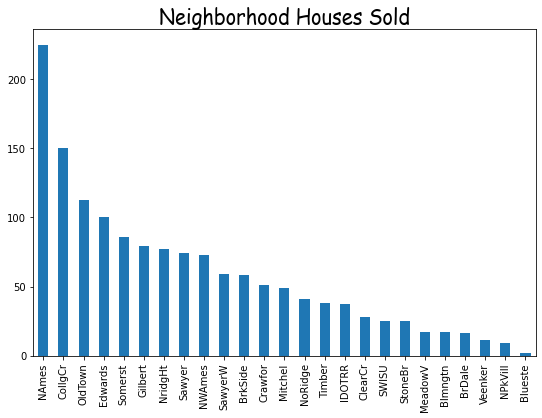

In [64]:
fig = plt.figure()
ax=train_raw['Neighborhood'].value_counts().plot(kind = 'bar',  
                                                  figsize=(9,6)) #.sort_index() after counts()
ax.set_title('Neighborhood Houses Sold', fontname='Comic Sans MS', fontsize=20)
fig.savefig('images/house_sold_by_neighborhood.png')

/Users/paulsprouse/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/paulsprouse/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


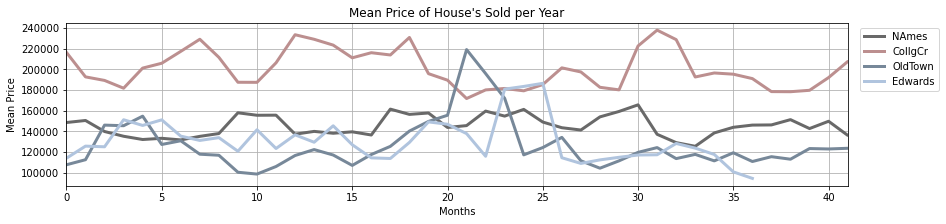

In [76]:

four_neigh_group = train_xy[train_xy['Neighborhood'].isin(FOUR_NEIGHBORHOODS)]
four_neigh_group['dateInt']=four_neigh_group['YrSold'].astype(str) + four_neigh_group['MoSold'].astype(str).str.zfill(2)+ '1'.zfill(2)
four_neigh_group['Date'] = pd.to_datetime(four_neigh_group['dateInt'], format='%Y%m%d')
four_neigh_group['Date']
plt.figure(figsize=(14,3))
fig.tight_layout()
for i, neigh_ in enumerate(FOUR_NEIGHBORHOODS):
    df_ = (four_neigh_group.loc[four_neigh_group['Neighborhood']==neigh_]
            .groupby(['Date']).agg({'SalePrice_real': 'mean'}).round().reset_index()
          )
    df_['Rolling_3_months'] = df_.rolling(3).mean().shift(-2)

    plt.plot(df_['Rolling_3_months'],
        label=neigh_,
        color = colors[i],
        linewidth=3)

#plt.xticks(np.arange(0,36))#, step=6))
plt.xlabel('Months') 
plt.ylabel('Mean Price')
plt.title("Mean Price of House's Sold per Year")
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.5)
plt.grid('True')

plt.xlim(0,41)
plt.savefig('images/Mean_price_3_mon_rolling.png')
plt.show()

In [68]:
NAmes=train_xy.loc[train_xy['Neighborhood']=='NAmes']

In [135]:
def group_it(df, grps):
    return df.groupby(grps).agg({'SalePrice_real':['count', 'mean', 'median', 'min', 'max']}).round().dropna()

In [136]:
print(group_it(NAmes, 'BedroomAbvGr'))
print(group_it(NAmes, 'GrLivArea'))

             SalePrice_real                                        
                      count      mean    median       min       max
BedroomAbvGr                                                       
1                         2  139500.0  139500.0  133000.0  146000.0
2                        57  129410.0  129900.0   87500.0  207500.0
3                       131  145588.0  143000.0   88000.0  244000.0
4                        28  176939.0  165750.0  104900.0  345000.0
5                         3  177100.0  154300.0  135000.0  242000.0
6                         4  150650.0  141800.0  119000.0  200000.0
                   SalePrice_real                                  
                            count      mean  median     min     max
GrLivArea                                                          
(1026.0, 1242.667]             66  134949.0  139000   87500  180500
(1242.667, 1464.0]             46  152043.0  156000   97500  181900
(1464.0, 1664.667]             20  159070.0  157

In [139]:
print(train_xy.groupby('SalePrice').agg({'SalePrice_real':['count', 'mean', 'median', 'min', 'max']}).dropna().round())

          SalePrice_real                                        
                   count      mean    median       min       max
SalePrice                                                       
1                      5   37482.0   37900.0   34900.0   40000.0
2                     23   64469.0   64500.0   52000.0   76500.0
3                    103   90276.0   90000.0   78000.0  103200.0
4                    226  117798.0  118500.0  103600.0  129000.0
5                    295  140972.0  140000.0  129500.0  154500.0
6                    248  168242.0  168500.0  154900.0  180500.0
7                    162  192450.0  191500.0  181000.0  206300.0
8                    115  219437.0  219500.0  206900.0  232000.0
9                     84  243911.0  242000.0  232600.0  258000.0
10                    63  270244.0  270000.0  259000.0  283463.0
11                    31  294398.0  293077.0  284000.0  309000.0
12                    38  320460.0  319450.0  310000.0  335000.0
13                    16 

Last working area <a name='bookmark' />

In [74]:
from ipywidgets import Layout, Button, Box, FloatText, Textarea, Dropdown, Label, IntSlider

form_item_layout = Layout(
    display='flex',
    flex_flow='row',
    justify_content='space-between'
)

form_items = [
    Box([Label(value='Age of the captain'), IntSlider(min=40, max=60)], layout=form_item_layout),
    Box([Label(value='Egg style'),
         Dropdown(options=['Scrambled', 'Sunny side up', 'Over easy'])], layout=form_item_layout),
    Box([Label(value='Ship size'),
         FloatText()], layout=form_item_layout),
    Box([Label(value='Information'),
         Textarea()], layout=form_item_layout)
]

form = Box(form_items, layout=Layout(
    display='flex',
    flex_flow='column',
    border='solid 2px',
    align_items='stretch',
    width='50%'
))
form

In [143]:
#print(train_x)
agg_data = pd.DataFrame()
tup = []
for val_ in ['OverallQual','OverallCond', 'HouseStyle', 'ExterQual', 'LotArea', 'Foundation',         'TotRmsAbvGrd', 'BsmtCond']:
    
    NAames_agg = (train_xy.loc[train_xy['Neighborhood'].isin(FOUR_NEIGHBORHOODS)]#['NAmes'])]
          [['Neighborhood', val_, 'SalePrice_real']]
          .groupby(val_).agg({'SalePrice_real': ['count','mean', 'min', 'max'] }).round()
         ).reset_index()
    for i,v in enumerate(NAames_agg[('SalePrice_real', 'count')]):#, ('SalePrice_real', 'mean')]):
        if v > 0:
            
            
            w=(NAames_agg[('SalePrice_real', 'mean')][i])
            x=(NAames_agg[('SalePrice_real', 'min')][i])
            y=(NAames_agg[('SalePrice_real', 'max')][i])
            j=(NAames_agg[val_][i])
            new_val = val_ + j
            
            tup.append([val_, j, v, w, x, y, y-x])
    df = pd.DataFrame(tup, columns=['factor', 'value', 'count', 'mean_price', 'min', 'max', 'range'])

print(df)

          factor                  value  count  mean_price       min  \
0    OverallQual                      1      1     61000.0   61000.0   
1    OverallQual                     10      4    286188.0  160000.0   
2    OverallQual                      3     14     92248.0   37900.0   
3    OverallQual                      4     63    108908.0   52500.0   
4    OverallQual                      5    226    130134.0   60000.0   
5    OverallQual                      6    143    152780.0   79000.0   
6    OverallQual                      7    104    199736.0  116900.0   
7    OverallQual                      8     29    250901.0  122000.0   
8    OverallQual                      9      4    289250.0  239000.0   
9    OverallCond                      1      1     61000.0   61000.0   
10   OverallCond                      2      1     87000.0   87000.0   
11   OverallCond                      3     15    103367.0   58500.0   
12   OverallCond                      4     30    116970.0   525